# กระบวนการทำ Data Analytic
0. จุดประสงค์ของการทำ Data Analytic คืออะไร
1. การเก็บข้อมูล/รวบรวมข้อมูลดิบ *
2. การตั้งคำถาม ตั้งสมมติฐาน 
3. การสร้างฐานข้อมูลเพื่อการวิเคราะห์ (Data Mart)
  - การเลือกข้อมูล
  - การจัดรูปแบบข้อมูล
  - การ clean ข้อมูล
4. การหาคำตอบจากข้อมูล ซึ่งอาจจะได้จากขั้นตอนที่ 3 หรือหา insight เพิ่มเติม
5. ระหว่างการหาคำตอบ จะมีคำถามใหม่เกิดขึ้นมา จนอาจจะนำมาสู่กระบวนการย้อนกลับไปสู่ขั้นตอน 1 หรือ 2
6. การสรุปผล 
** 1 กับ 2 อาจจะสลับกัน บางครั้งเราก็ตั้งคำถามก่อนรวมรวมข้อมูล

In [ ]:
# Install libraries
!pip install pygsheets
!pip install pythainlp

In [ ]:
!gdown --id 175HCEziwBcWBffjE9O50q4HivfB8DYE4
!gdown --id 1zT3xZTgWHiiMg5lwtB0iEjcVvFuu4O-7
!gdown --id 14pjXRN_Y3Fmf5VKzMgu_ewReD82J1OKP

Downloading...
From: https://drive.google.com/uc?id=175HCEziwBcWBffjE9O50q4HivfB8DYE4
To: /content/botnoiw2v.py
100% 389/389 [00:00<00:00, 667kB/s]
Downloading...
From: https://drive.google.com/uc?id=1zT3xZTgWHiiMg5lwtB0iEjcVvFuu4O-7
To: /content/botnoiw2v_small.mod
19.0MB [00:00, 116MB/s] 
Downloading...
From: https://drive.google.com/uc?id=14pjXRN_Y3Fmf5VKzMgu_ewReD82J1OKP
To: /content/TH-Sarabun-New.zip
100% 415k/415k [00:00<00:00, 53.6MB/s]


#0. ตั้งจุดประสงค์ของการวิเคราะห์ข้อมูล
- เข้าใจคนที่เรียน จะได้สอนได้ตรงกับความต้องการ
- จัดแบ่งกลุ่มคนเรียน
- ดูเรื่องของการสมัคร จะได้ปรับปรุงคราวหน้า

# 1. การเก็บข้อมูล
ข้อมูลที่ได้ อาจจะมาจากหลายช่องทาง อาทิ การทำการสำรวจ ระบบการจอง ระบบการซื้อการขาย website แชทบอท social media เป็นต้น

ข้อมูลที่เรานำมาวิเคราะห์ในคลาสนี้ เป็นข้อมูลที่ผู้สมัครกรอกแบบสอบถามบน Google Form ซึ่งมีการบันทึกข้อมูลต่าง ๆ ดังต่อไปนี้
1. **Timestamp** เป็นข้อมูลวัน และ เวลาที่มีการกรอกแบบสอบถาม
2. **สะดวกเรียนช่วงเวลาไหน** ช่วงเวลาที่สะดวกเรียน
3. **อายุ** ช่วงอายุของผู้สมัคร
4. **อาชีพ** อาชีพของผู้สมัคร
5. **สถานที่ทำงาน/เรียน** บริษัท หรือ สถานศึกษา ของผู้สมัคร
6. **สาขาที่เรียนจบ / กำลังศึกษา** สาขาวิชาที่เรียนจบ หรือ สาชาวิชาที่กำลังศึกษาอยู่
7. **มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน** ความรู้ด้านการเขียนโปรแกรม
8. **ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคยเรียนคลาสไหนมา** เคยผ่านการอบรมกับทาง BOTNOI มาก่อนหรือไม่
9. **ทำไมถึงสนใจสมัครเรียน** เหตุผลที่ผู้สมัครสนใจลงเรียนคตลาสนี้
10. **ความคาดหวังจากการมาเรียน** สิ่งที่ผู้สมัครคาดหวัง เมื่อเรียนจบ
11. **กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน** ช่องทางที่ผู้สมัครทราบข่าวเกี่ยวกับคลาสเรียน เช่น Line, Facebook หรือ Twitter เป็นต้น
12. **ยืนยันลงทะเบียน** ผู้สมัครได้ทำการยืนยันการลงทะเบียนหรือไม่
13. **ชำระเงิน** สถานะการชำระเงินของผู้สมัคร

In [ ]:
# โค้ดในส่วนของการเชื่อมต่อกับ google sheet
import pygsheets #read googlesheet
import google.auth
from google.colab import auth
import seaborn as sns
import warnings
import pandas as pd
# set maximum row to unlimit
pd.options.display.max_rows = 999
warnings.filterwarnings('ignore')
auth.authenticate_user() #access google
credentials, _ = google.auth.default()
gc = pygsheets.client.Client(credentials)

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/19TdzE_ptLt364rekEqz6LN0mOVyX2Q0AkuOGjkXGLUY/edit?usp=sharing'
sheet = gc.open_by_url(url)
# Get data from google sheet
dat = sheet.sheet1.get_as_df()
dat.head()

,Timestamp,สะดวกเรียนช่วงเวลาไหน,อายุ,อาชีพ,สถานที่ทำงาน/เรียน,สาขาที่เรียนจบ / กำลังศึกษา,มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน,ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคย เรียนคลาสไหนมา,ทำไมถึงสนใจสมัครเรียน,ความคาดหวังจากการมาเรียน,กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน,ชำระเงิน
0,9/19/2020 20:29:20,"จันทร์ ถึง ศุกร์ เวลา 10:00 ถึง 18:00, เสาร์ และ อาทิตย์ 09:00 ถึง 12:00",20 - 30 ปี,Robotics engineer,VISTEC ( สถาบันวิทยสิริเมธี สำนักวิชา วิทยาศาสตร์และเทคโนโลยี ),Mechanical engineering,มีพื้นฐานการเขียน Python (Object-oriented) และ C++\n- Python ได้มีโอกาสเขียนสมัยเรียนอยู่ปี 1 พว...,ยังไม่เคยเรียนผ่าน BOTNOI ครับ,ต้องการประสบการณ์การทำงานเป็นทีมร่วมกับเพื่อนๆใหม่ แลกเปลี่ยนความคิดเห็นรวมทั้งเปิดโลกในด้าน Dat...,ได้เรียนรู้ Concept และการ Applied ใช้งานของโมเดล Machine learning แบบต่างๆ พบเจอเพื่อนใหม่ๆที่ส...,Super AI Engineer Project,NaN
1,9/19/2020 21:58:11,จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00,30 - 40 ปี,นักศึกษา,มหาวิทยาลัยหอการค้าไทย,มหาวิทยาลัยหอการค้าไทย,มี,ศึกษาเอง,ประกอบการทำงานวิจัย,ได้รับความรู้เพิ่มเติม และเพิ่มทักษะความเชี่ยวชาญ สนใจด้าน AI,Facebook,1.0
2,9/20/2020 7:38:33,"จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00, เสาร์ และ อาทิตย์ 09:00 ถึง 12:00",40 ปี ขึ้นไป,PM,บริษัทโปรเดฟจำกัด,พระจอมเกล้าธนบุรี,C#,Chatbot School รุ่นที่ 1,อยากหาความรู้เพิ่ม,ไม่มี,FB,1.0
3,9/20/2020 7:58:09,จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00,20 - 30 ปี,ศึกษาเองที่บ้าน,ศึกษาเองที่บ้าน,ศึกษาเองที่บ้าน,เคยเรียน python,ไม่เคย,สนใจด้าน data,เข้าใจพื้นฐานของ data science,Facebook,NaN
4,9/20/2020 8:08:24,จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00,20 - 30 ปี,พนักงานรัฐวิสาหกิจ​,บริษัท​วิทยุการบินแห่งประเทศไทย,"คณิตศาสตร์ประกันภัย, Business Analytic","Javascript, Python",Chatbot School รุ่นที่ 1,สนใจทำอยากทำpart-time \nอยากรู้จัก community เกี่ยวกับสายงานนีัมากขึ้นและได้แนวคิด แนวทางปฎิบัติ...,เข้าใจหลักการและสามารถไปทำงานได้จริง\nหารายได้เสริมจากงานประจำ,Botnoi Chatbot School #1,1.0


In [ ]:
dat = dat[dat['ชำระเงิน']==1]
introdf = dat[['กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน']]
introdf['ช่องทางรับข่าวสาร'] = dat[['กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน']]
intro = introdf['กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน'].str.lower().str.strip()
introdf['กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน'][(intro.str.find('line')!=-1)|(intro.str.find('ไลน์')!=-1)|(intro.str.find('loa')!=-1)]='LINE'
#introdf['กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน'][(intro.str.find('super')!=-1)]='Superai'
introdf['กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน'][(intro.str.find('face')!=-1)|(intro.str.find('inst')!=-1)|(intro.str.find('super')!=-1)|(intro.str.find('google')!=-1)|(intro.str.find('win')!=-1)|(intro.str.find('medium')!=-1)|(intro.str.find('*')!=-1)]='others'
introdf['กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน'][(intro.str.find('face')!=-1)|(intro.str.find('inst')!=-1)|(intro.str.find('เฟส')!=-1)|(intro.str.find('เฟซ')!=-1)|(intro.str.find('fb')!=-1)|(intro.str.find('เพจ')!=-1)]='Facebook'
introdf['กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน'][(intro.str.find('botnoi')!=-1)|(intro.str.find('บอทน้อย')!=-1)|(intro.str.find('กลุ่ม')!=-1)]='BN Group'
introdf['กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน'][(intro.str.find('cu')!=-1)|(intro.str.find('แนะนำ')!=-1)|(intro.str.find('friend')!=-1)|(intro.str.find('อาจารย์')!=-1)|(intro.str.find('น้า')!=-1)|(intro.str.find('เพื่อน')!=-1)|(intro.str.find('งาน')!=-1)|(intro.str.find('เจ้านาย')!=-1)|(intro.str.find('หัวหน้า')!=-1)|(intro.str.find('พี่')!=-1)|(intro.str.find('ญาติ')!=-1)|(intro.str.find('datascienceessential')!=-1)]='Refer'

In [ ]:
rp = (introdf['กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน'].value_counts(normalize=True)*100)
import pylab as py
rp.values

array([38.37837838, 24.32432432, 23.24324324, 10.27027027,  3.78378378])

Text(0, 0.5, '%')

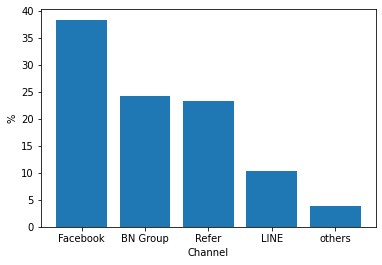

In [ ]:
py.bar(rp.index,rp.values)
py.xlabel('Channel')
py.ylabel('%')

In [ ]:
# แสดงหัวข้อทั้งหมดของฐานข้อมูล
dat.columns

Index(['Timestamp', 'สะดวกเรียนช่วงเวลาไหน', 'อายุ', 'อาชีพ',
       'สถานที่ทำงาน/เรียน ', 'สาขาที่เรียนจบ / กำลังศึกษา',
       'มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน',
       'ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคย เรียนคลาสไหนมา',
       'ทำไมถึงสนใจสมัครเรียน', 'ความคาดหวังจากการมาเรียน',
       'กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน', 'ชำระเงิน'],
      dtype='object')

In [ ]:
dat[dat['ชำระเงิน']==1]

,Timestamp,สะดวกเรียนช่วงเวลาไหน,อายุ,อาชีพ,สถานที่ทำงาน/เรียน,สาขาที่เรียนจบ / กำลังศึกษา,มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน,ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคย เรียนคลาสไหนมา,ทำไมถึงสนใจสมัครเรียน,ความคาดหวังจากการมาเรียน,กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน,ชำระเงิน
1,9/19/2020 21:58:11,จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00,30 - 40 ปี,นักศึกษา,มหาวิทยาลัยหอการค้าไทย,มหาวิทยาลัยหอการค้าไทย,มี,ศึกษาเอง,ประกอบการทำงานวิจัย,ได้รับความรู้เพิ่มเติม และเพิ่มทักษะความเชี่ยวชาญ สนใจด้าน AI,Facebook,1.0
2,9/20/2020 7:38:33,"จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00, เสาร์ และ อาทิตย์ 09:00 ถึง 12:00",40 ปี ขึ้นไป,PM,บริษัทโปรเดฟจำกัด,พระจอมเกล้าธนบุรี,C#,Chatbot School รุ่นที่ 1,อยากหาความรู้เพิ่ม,ไม่มี,FB,1.0
4,9/20/2020 8:08:24,จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00,20 - 30 ปี,พนักงานรัฐวิสาหกิจ​,บริษัท​วิทยุการบินแห่งประเทศไทย,"คณิตศาสตร์ประกันภัย, Business Analytic","Javascript, Python",Chatbot School รุ่นที่ 1,สนใจทำอยากทำpart-time \nอยากรู้จัก community เกี่ยวกับสายงานนีัมากขึ้นและได้แนวคิด แนวทางปฎิบัติ...,เข้าใจหลักการและสามารถไปทำงานได้จริง\nหารายได้เสริมจากงานประจำ,Botnoi Chatbot School #1,1.0
7,9/20/2020 8:55:30,เสาร์ และ อาทิตย์ 09:00 ถึง 12:00,30 - 40 ปี,พนักงานออฟฟิศ,AirAsia,Economics,ไม่มี,ไม่เคย,อยากพัฒนาความรู้ด้าน data science,สามารถนำความรู้ไปใช้ในการทำงานได้,จาก facebook ดร.วินน์,1.0
8,9/20/2020 9:08:17,จันทร์ ถึง ศุกร์ เวลา 10:00 ถึง 18:00,20 - 30 ปี,วิศวกร,การไฟฟ้าส่วนภูมิภาค,ไฟฟ้ากำลัง,"Python, C++, HTML, Javascript, CSS",ตามมาจาก Super AI Engineer,"อยากศึกษาเรื่องการทำ data analytics, หลักการ deploy project นอกจากนี้ project ของ #1 ที่มีการนำเ...",สามารถนำความรู้ไป deploy เป็น project ใน real world ได้ และได้รับความรู้ที่จะนำไปต่อยอดต่อไป,fb: Botnoi AI & Data science classroom,1.0
12,9/20/2020 16:23:54,"จันทร์ ถึง ศุกร์ เวลา 10:00 ถึง 18:00, จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00",40 ปี ขึ้นไป,นักศึกษา ปริญญาโท,มหาวิทยาลัยธุรกิจบัณฑิต,Big data engineering,Python,ไม่เคย,อยากเอาความรู้ด้าน Python ไปใช้งาน Data Sci,มีความรู้ Python Data Sci,Facebook,1.0
13,9/20/2020 17:40:59,"จันทร์ ถึง ศุกร์ เวลา 10:00 ถึง 18:00, จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00",30 - 40 ปี,Postdoctoral fellow,University of Bergen,เคมี,มี ภาษาที่ถนัด R และ Python,ไม่เคย,มีความสนใจเปลี่ยนสายงานไปทำด้าน data science,สามารถนำความรู้ที่ได้ไปลองปรับใช้ในงานวิจัย และสามารถมีความรู้ที่จะนำไปสมัครงานทางด้าน data scie...,Facebook,1.0
14,9/20/2020 22:24:23,"จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00, เสาร์ และ อาทิตย์ 09:00 ถึง 12:00",30 - 40 ปี,พนักงานบริษัท,บ.ซี.พี.แลนด์,Information technology (Business information systems),เคยเรียนแต่ไม่ได้เขียนจริงจัง,ไม่เคยครับ,รู้สึกว่าเป็นทักษะที่มีความสำคัญและจำเป็นอย่างมากในอนาคต,เข้าใจภาพรวม Data science มากขึ้นและได้ลงมือทำงานจริงจากความรู้ที่ได้เรียน,Facebook,1.0
15,9/20/2020 23:05:48,เสาร์ และ อาทิตย์ 09:00 ถึง 12:00,40 ปี ขึ้นไป,รับจ้างทั่วไป,"Supersave Lighting co.,ltd",Bussiness computer,เคยสมัยเรียนและไม่ได้นำมาใช้อีก,Chatbot School รุ่นที่ 1,เปลี่ยนสายงานอาชีและพัฒนาทักษะการทำงาน,นำไปใช้ทำงานเป็นอาชีพได้จริงๆ,FB Botnoi AI & Data science classroom,1.0
16,9/21/2020 10:54:18,"จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00, เสาร์ และ อาทิตย์ 09:00 ถึง 12:00",30 - 40 ปี,นักกำหนดอาหาร,"Eat well concept co.,ltd",โภชนาการและการกำหนดอาหาร,ไม่มี,ไม่เคย,สนใจพัฒนาทักษะด้าน data science เพื่อต่อยอดการทำงานในเชิงบริษัทมากขึ้น,สามารถวิเคราะห์และเล่นกับ data ได้อย่างเชี่ยวชาญมากขึ้น ผ่านฟังก์ชันของโปรแกรมต่างๆ ที่เกี่ยวข้อง,ผู้ร่วมงาน,1.0


In [ ]:
# เลือกเฉพาะผู้สมัครที่ชำระค่าลงทะเบียน
dat = dat[dat['ชำระเงิน']==1]

In [ ]:
# นับจำนวนทั้งหมด
len(dat)

185

In [ ]:
# ดูข้อมูลแค่ 5 บรรทัดแรก
dat.head()

,Timestamp,สะดวกเรียนช่วงเวลาไหน,อายุ,อาชีพ,สถานที่ทำงาน/เรียน,สาขาที่เรียนจบ / กำลังศึกษา,มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน,ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคย เรียนคลาสไหนมา,ทำไมถึงสนใจสมัครเรียน,ความคาดหวังจากการมาเรียน,กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน,ชำระเงิน
1,9/19/2020 21:58:11,จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00,30 - 40 ปี,นักศึกษา,มหาวิทยาลัยหอการค้าไทย,มหาวิทยาลัยหอการค้าไทย,มี,ศึกษาเอง,ประกอบการทำงานวิจัย,ได้รับความรู้เพิ่มเติม และเพิ่มทักษะความเชี่ยวชาญ สนใจด้าน AI,Facebook,1.0
2,9/20/2020 7:38:33,"จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00, เสาร์ และ อาทิตย์ 09:00 ถึง 12:00",40 ปี ขึ้นไป,PM,บริษัทโปรเดฟจำกัด,พระจอมเกล้าธนบุรี,C#,Chatbot School รุ่นที่ 1,อยากหาความรู้เพิ่ม,ไม่มี,FB,1.0
4,9/20/2020 8:08:24,จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00,20 - 30 ปี,พนักงานรัฐวิสาหกิจ​,บริษัท​วิทยุการบินแห่งประเทศไทย,"คณิตศาสตร์ประกันภัย, Business Analytic","Javascript, Python",Chatbot School รุ่นที่ 1,สนใจทำอยากทำpart-time \nอยากรู้จัก community เกี่ยวกับสายงานนีัมากขึ้นและได้แนวคิด แนวทางปฎิบัติ...,เข้าใจหลักการและสามารถไปทำงานได้จริง\nหารายได้เสริมจากงานประจำ,Botnoi Chatbot School #1,1.0
7,9/20/2020 8:55:30,เสาร์ และ อาทิตย์ 09:00 ถึง 12:00,30 - 40 ปี,พนักงานออฟฟิศ,AirAsia,Economics,ไม่มี,ไม่เคย,อยากพัฒนาความรู้ด้าน data science,สามารถนำความรู้ไปใช้ในการทำงานได้,จาก facebook ดร.วินน์,1.0
8,9/20/2020 9:08:17,จันทร์ ถึง ศุกร์ เวลา 10:00 ถึง 18:00,20 - 30 ปี,วิศวกร,การไฟฟ้าส่วนภูมิภาค,ไฟฟ้ากำลัง,"Python, C++, HTML, Javascript, CSS",ตามมาจาก Super AI Engineer,"อยากศึกษาเรื่องการทำ data analytics, หลักการ deploy project นอกจากนี้ project ของ #1 ที่มีการนำเ...",สามารถนำความรู้ไป deploy เป็น project ใน real world ได้ และได้รับความรู้ที่จะนำไปต่อยอดต่อไป,fb: Botnoi AI & Data science classroom,1.0


# 2. การตั้งคำถาม ตั้งสมมติฐาน ตั้งเป้าหมายของการวิเคราะห์

2.1 ตั้งคำถาม
- เพื่อเตรียมตัวสอน สำหรับคนสอน
  - อยากรู้ว่า expectation ของผู้เรียนเป็นยังไง
  - อยากรู้ว่าทำไมถึงสนใจเรียน
  - อยากรู้พื้นฐานการเขียนโปรแกรม
  - อยากรู้ว่ากลุ่มอายุและเพศ
  - อยากรู้อาชีพ
  - อยากรู้สถานที่เรียน/ทำงาน

- เพื่อเข้าใจการสมัคร สำหรับฝั่ง marketing
  - อยากรู้ว่าสมัครช่องทางไหน
  - อยากรู้ว่ารู้ข่าวจากไหน
  - อยากรู้ช่วงเวลาที่สมัคร

2.2 ตั้งสมมติฐาน
- จะมีคนสมัครเป็นผู้หญิงประมาณ 30%
- มีกลุ่มคนสมัครเป็น เจ้าของธุรกิจ ผู้บริหาร พนักงานบริษัท นักศึกษา

2.3. ตั้งเป้าหมาย
- เพื่อจัดกลุ่มย่อย 20 กรุ๊ป โดยในแต่ละกรุ๊ปจะมีต้องมีความเท่าเทียม นั่นคือมีความหลากหลายของคนในกลุ่ม เช่น มีโปรแกรมเมอร์ มี business มี marketing มีนักศึกษา มีคนทำงาน

#3. การสร้างฐานข้อมูลเพื่อการวิเคราะห์ (Data Mart)
- เพื่อการวิเคราะห์เราต้องมีการจัดข้อมูลให้เหมาะสมสำหรับการนำมาวิเคราะห์

##3.1 ข้อมูลอายุ

In [ ]:
dat[['อายุ']].head()

,อายุ
1,30 - 40 ปี
2,40 ปี ขึ้นไป
4,20 - 30 ปี
7,30 - 40 ปี
8,20 - 30 ปี


In [ ]:
datage = dat[['อายุ']]
datage.head()

,อายุ
1,30 - 40 ปี
2,40 ปี ขึ้นไป
4,20 - 30 ปี
7,30 - 40 ปี
8,20 - 30 ปี


In [ ]:
datage['อายุ'].value_counts()

20 - 30 ปี      78
30 - 40 ปี      55
40 ปี ขึ้นไป    28
15 - 20 ปี      24
Name: อายุ, dtype: int64

In [ ]:
datage = datage.replace('20 - 30 ปี','20-30')
datage = datage.replace('30 - 40 ปี','30-40')
datage = datage.replace('40 ปี ขึ้นไป','>40')
datage = datage.replace('15 - 20 ปี','<20')
datage.head()

,อายุ
1,30-40
2,>40
4,20-30
7,30-40
8,20-30


In [ ]:
datage['อายุ'].value_counts()

20-30    78
30-40    55
>40      28
<20      24
Name: อายุ, dtype: int64

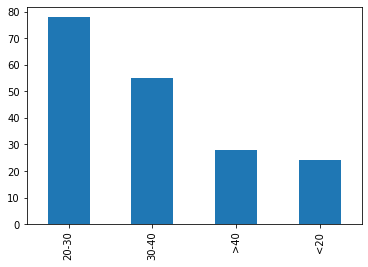

In [ ]:
datage['อายุ'].value_counts().plot.bar()

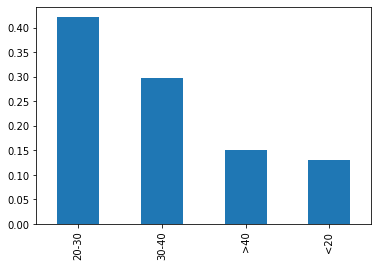

In [ ]:
datage['อายุ'].value_counts(normalize=True).plot.bar()

###สรุปเรื่องอายุ
- ถ้าตอนเก็บข้อมูลถามเป็นวันเดือนปีเกิด จะได้การวิเคราะห์ที่ดีกว่านี้
- การถามอายุอาจจะส่งผลไม่ดีต่อความรู้สึก อาจจะถามเป็น วันเดือนปีเกิด แทน
- สมมติฐานที่เกิดขึ้นระหว่างการดูข้อมูลคือ กลุ่ม 20-30 ปี เป็นกลุ่มนักศึกษา 30-40 ปี เป็นพนักงานออฟฟิส 40 ปีขึ้นไปเป็นผู้บริหาร

##3.2 ข้อมูลการเขียนโปรแกรม

In [ ]:
dat.columns

Index(['Timestamp', 'สะดวกเรียนช่วงเวลาไหน', 'อายุ', 'อาชีพ',
       'สถานที่ทำงาน/เรียน ', 'สาขาที่เรียนจบ / กำลังศึกษา',
       'มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน',
       'ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคย เรียนคลาสไหนมา',
       'ทำไมถึงสนใจสมัครเรียน', 'ความคาดหวังจากการมาเรียน',
       'กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน', 'ชำระเงิน'],
      dtype='object')

In [ ]:
# แสดงข้อมูลของพื้นฐานการเขียนโปรแกรม
pskill = dat[['มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน']]
display(pskill.head())
# กำหนดชื่อคอลัมน์
pskill.columns = ['programming']
display(pskill.head())
#pskill


,มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน
1,มี
2,C#
4,"Javascript, Python"
7,ไม่มี
8,"Python, C++, HTML, Javascript, CSS"


,programming
1,มี
2,C#
4,"Javascript, Python"
7,ไม่มี
8,"Python, C++, HTML, Javascript, CSS"


- ข้อมูลเป็น free text ไม่ใช่เป็นหัวข้อ ดังนั้นเราต้องทำให้ข้อมูลเป็นหัวข้อ category หรือตัวเลข numeric เพื่อใช้ในการวิเคราะห์
- อยากแยกกลุ่มคนที่เขียนโปรแกรมได้ กับไม่ได้
- อยากได้ข้อมูลของคนที่เขียน Python ได้ เพราะเป็นภาษาหลัก
- อยากได้ข้อมูลของคนที่เขียน R ได้ เพราะเป็นอีกภาษาที่แสดงถึงว่า น่าจะมีพื้นฐานการวิเคราะห์
- อยากได้ข้อมูลของคนที่เขียน Go ได้ เพราะน่าจะเป็น hardcore
- อยากจัดระดับความสามารถ
- สำหรับคนที่เขียนโปรแกรมได้ อยากจะแยกกลุ่มเป็น fullstack frontend backend โดยดูจากภาษาที่ใช้


In [ ]:
pskill['programming'].str.lower().str.contains('ไม่')

1      False
2      False
4      False
7       True
8      False
12     False
13     False
14      True
15      True
16      True
19     False
20      True
21     False
22     False
23     False
24     False
25      True
26     False
27      True
28     False
31     False
32     False
33     False
35     False
36     False
37     False
39     False
41     False
42     False
43     False
44     False
46      True
47      True
52     False
54     False
55      True
56      True
57     False
59     False
63      True
65     False
66     False
67      True
68     False
71     False
74     False
75      True
77     False
80     False
81     False
82     False
84     False
86     False
87     False
88     False
89      True
90     False
91     False
94     False
97      True
98     False
99     False
100    False
101    False
102    False
103     True
106     True
107     True
109    False
110     True
111    False
112    False
113    False
114    False
115     True
119    False
123    False

In [ ]:
# หาคนที่ไม่มีพื้นฐานการเขียนโปรแกรม โดยใช้สมมติฐานว่า มีค่าว่า 'ไม่มี'
noprogrammingskill = (pskill['programming'].str.lower().str.contains('ไม่')) | (pskill['programming'].str.lower().str.contains('no'))
noprogrammingskill.sum()

#noprogrammingskill = pskill['programming'].str.lower().str.contains('no')
#noprogrammingskill.sum()

60

In [ ]:
# คนที่เหลือคือมีพื้นฐานในการเขียนโปรแกรม
programmingskill = ~noprogrammingskill
programmingskill.sum()

125

In [ ]:
# หาคนที่มีพื้นฐานการเขียน Python โดยใช้สมมติฐานว่า มีคำว่า python อยู่
pythonskill = pskill['programming'].str.lower().str.contains('python')
pythonskill.sum()

91

In [ ]:
# สมมติฐานเขียนเยอะน่าจะเก่ง
lenskill = pskill['programming'].str.len()

In [ ]:
# ดูสมมติฐานเบื้องต้น แต่ผลลัพธ์ไม่ค่อยดี เพราะบางคนบรรยายเยอะ
plenskill = pskill.copy()
plenskill['lenskill'] = lenskill
plenskill = plenskill.sort_values(by='lenskill',ascending=False)
plenskill.iloc[10]['programming']

'SQL 1ปี ครึ่ง \nPython 1 ปี เน้นไปแนว business ไม่ค่อย dev หลักๆ ใช้  library : pandas , numpy '

In [ ]:
nplen = pskill['programming'].str.replace(',','').str.replace('#','').str.extract('([a-zA-Z ]+)')[0].str.lower().str.len()
npskill = pskill.copy()
npskill['nskill'] = nplen
npskill = npskill.fillna(0)
npskill.sort_values(by='nskill',ascending=False)

,programming,nskill
111,"1 year with python specifically in pandas, scikit learn, matplotlib, numpy, opencv2.",77.0
151,"basic java and python, basic html and javascript",47.0
490,"เรียนจบ Data scientist with bython career track ของ DataCamp, แข่ง Shopee Code league",41.0
195,"มีพื้นฐาน Python, R programing, SAS, SPSS",29.0
102,มี python c c# java html js sql,28.0
57,"javascript, c#, scala, python",25.0
213,"Matlab, Pascal, Fortran, C",23.0
296,"python, R, Java, Kotlin",20.0
44,"C#, javascript,python",18.0
65,"C#, Web programming",17.0


In [ ]:
plist = pskill['programming'].str.replace(',','').str.replace('#','').str.extract('([a-zA-Z ]+)')[0].str.lower().values
plist

array([nan, 'c', 'javascript python', nan, 'python c', 'python ', ' ',
       nan, nan, nan, 'python ', ' ', 'vb', ' python ', ' ', ' ml ',
       ' python ', ' python ', nan, ' ', 'python ', 'python ', 'c', ' ',
       'sql', 'python ', 'python ', 'vb', ' python', 'vb php',
       'c javascriptpython', nan, nan, 'yes', 'c', nan, ' base on c ',
       'javascript c scala python', 'no', 'python ', 'c web programming',
       'cc', nan, 'no', 'c', 'c java', nan, 'php', 'python ', 'python',
       'php ', ' python ', 'sql ', 'python ', 'python', 'sql ', 'mql',
       ' java c', 'c  java', 'python ', 'basic python', 'pythonjavac',
       'python ', ' python ', ' python c c java html js sql', ' python ',
       ' ', nan, ' ', nan,
       ' year with python specifically in pandas scikit learn matplotlib numpy opencv',
       'c', 'python r ', ' ', nan, ' arduino ', 'basic sql', 'java',
       'python ', 'python ', 'python ', 'c', 'python', 'python',
       ' python', nan, ' ', nan, ' java sq

In [ ]:
for p in plist:
  print(str(p).strip().split(' '))

['nan']
['c']
['javascript', 'python']
['nan']
['python', 'c']
['python']
['']
['nan']
['nan']
['nan']
['python']
['']
['vb']
['python']
['']
['ml']
['python']
['python']
['nan']
['']
['python']
['python']
['c']
['']
['sql']
['python']
['python']
['vb']
['python']
['vb', 'php']
['c', 'javascriptpython']
['nan']
['nan']
['yes']
['c']
['nan']
['base', 'on', 'c']
['javascript', 'c', 'scala', 'python']
['no']
['python']
['c', 'web', 'programming']
['cc']
['nan']
['no']
['c']
['c', 'java']
['nan']
['php']
['python']
['python']
['php']
['python']
['sql']
['python']
['python']
['sql']
['mql']
['java', 'c']
['c', '', 'java']
['python']
['basic', 'python']
['pythonjavac']
['python']
['python']
['python', 'c', 'c', 'java', 'html', 'js', 'sql']
['python']
['']
['nan']
['']
['nan']
['year', 'with', 'python', 'specifically', 'in', 'pandas', 'scikit', 'learn', 'matplotlib', 'numpy', 'opencv']
['c']
['python', 'r']
['']
['nan']
['arduino']
['basic', 'sql']
['java']
['python']
['python']
['python']
['

In [ ]:
splist = []
for p in plist:
  splist = splist + str(p).strip().split(' ')
splist

['nan',
 'c',
 'javascript',
 'python',
 'nan',
 'python',
 'c',
 'python',
 '',
 'nan',
 'nan',
 'nan',
 'python',
 '',
 'vb',
 'python',
 '',
 'ml',
 'python',
 'python',
 'nan',
 '',
 'python',
 'python',
 'c',
 '',
 'sql',
 'python',
 'python',
 'vb',
 'python',
 'vb',
 'php',
 'c',
 'javascriptpython',
 'nan',
 'nan',
 'yes',
 'c',
 'nan',
 'base',
 'on',
 'c',
 'javascript',
 'c',
 'scala',
 'python',
 'no',
 'python',
 'c',
 'web',
 'programming',
 'cc',
 'nan',
 'no',
 'c',
 'c',
 'java',
 'nan',
 'php',
 'python',
 'python',
 'php',
 'python',
 'sql',
 'python',
 'python',
 'sql',
 'mql',
 'java',
 'c',
 'c',
 '',
 'java',
 'python',
 'basic',
 'python',
 'pythonjavac',
 'python',
 'python',
 'python',
 'c',
 'c',
 'java',
 'html',
 'js',
 'sql',
 'python',
 '',
 'nan',
 '',
 'nan',
 'year',
 'with',
 'python',
 'specifically',
 'in',
 'pandas',
 'scikit',
 'learn',
 'matplotlib',
 'numpy',
 'opencv',
 'c',
 'python',
 'r',
 '',
 'nan',
 'arduino',
 'basic',
 'sql',
 'java',
 

In [ ]:
from collections import Counter, OrderedDict
pdict=Counter(splist)
OrderedDict(pdict.most_common())

OrderedDict([('python', 65),
             ('nan', 42),
             ('c', 30),
             ('', 23),
             ('java', 13),
             ('sql', 12),
             ('r', 6),
             ('basic', 5),
             ('html', 5),
             ('javascript', 4),
             ('vb', 3),
             ('php', 3),
             ('no', 3),
             ('js', 2),
             ('with', 2),
             ('and', 2),
             ('vba', 2),
             ('ml', 1),
             ('javascriptpython', 1),
             ('yes', 1),
             ('base', 1),
             ('on', 1),
             ('scala', 1),
             ('web', 1),
             ('programming', 1),
             ('cc', 1),
             ('mql', 1),
             ('pythonjavac', 1),
             ('year', 1),
             ('specifically', 1),
             ('in', 1),
             ('pandas', 1),
             ('scikit', 1),
             ('learn', 1),
             ('matplotlib', 1),
             ('numpy', 1),
             ('opencv', 1),
      

In [ ]:
frontendproglist = ['javascript','vuejs','nodejs','html','js','jquery','web','angular','react','css','htmlcss','php']
backendproglist = ['python','go','c','java','cpython']
dataproglist = ['r','cognos','sql','vba','matlab','pyspark','rapidminer','spss','sas']
pythonproglist = ['python']

In [ ]:
spu = set(plist[2].split(' '))
set(plist[2].split(' '))

{'javascript', 'python'}

In [ ]:
spu.intersection(frontendproglist)

{'javascript'}

In [ ]:
len(spu.intersection(frontendproglist))

1

In [ ]:
frontendproglist = ['javascript','vuejs','nodejs','html','js','jquery','web','angular','react','css','htmlcss','php']
backendproglist = ['python','go','c','java']
dataproglist = ['r','cognos','sql','vba','matlab','pyspark','rapidminer']
pythonproglist = ['python']
def getprogprofile(plist):
  frontendproglist = ['javascript','vuejs','nodejs','html','js','jquery','web','angular','react','css','htmlcss','php']
  backendproglist = ['python','go','c','java']
  dataproglist = ['r','cognos','sql','vba','matlab','pyspark','rapidminer']
  pythonproglist = ['python']
  pprofile = []
  for p in plist:
    spu = set(str(p).split(' '))
    fp = len(spu.intersection(frontendproglist))
    bp = len(spu.intersection(backendproglist))
    dp = len(spu.intersection(dataproglist))
    pp = len(spu.intersection(pythonproglist))
    pprofile.append([fp,bp,dp,pp])
  return pprofile

In [ ]:
pprofile = getprogprofile(plist)
pprofile = pd.DataFrame(data=pprofile,columns=['frontend','backend','data','python'])
pprofile.head()

,frontend,backend,data,python
0,0,0,0,0
1,0,1,0,0
2,1,1,0,1
3,0,0,0,0
4,0,2,0,1


In [ ]:
pskill.head()

,programming
1,มี
2,C#
4,"Javascript, Python"
7,ไม่มี
8,"Python, C++, HTML, Javascript, CSS"


In [ ]:
# แบ่ง cluster ของกลุ่มความสามารถในการเขียนโปรแกรม ด้วย K-means
from sklearn.cluster import KMeans
clus = KMeans(n_clusters=6, random_state=0).fit_predict(pprofile)
pprofile['prog_clus'] = clus
pprofile.head()

,frontend,backend,data,python,prog_clus
0,0,0,0,0,0
1,0,1,0,0,4
2,1,1,0,1,1
3,0,0,0,0,0
4,0,2,0,1,1


In [ ]:
pprofile.groupby(by='prog_clus').mean()

,frontend,backend,data,python
prog_clus,,,,
0,0.000000,0.000000,0.058824,0.000000
1,0.018519,1.111111,0.000000,1.000000
2,0.000000,1.090909,1.363636,0.727273
3,1.666667,2.333333,0.333333,1.000000
4,0.041667,1.166667,0.000000,0.000000
5,1.000000,0.000000,0.000000,0.000000


In [ ]:
pprofile['prog_clus'] = pprofile['prog_clus'].replace(0,'p_noskill')
pprofile['prog_clus'] = pprofile['prog_clus'].replace(1,'p_python')
pprofile['prog_clus'] = pprofile['prog_clus'].replace(2,'p_data')
pprofile['prog_clus'] = pprofile['prog_clus'].replace(3,'p_fullstack')
pprofile['prog_clus'] = pprofile['prog_clus'].replace(4,'p_backend')
pprofile['prog_clus'] = pprofile['prog_clus'].replace(5,'p_frontend')
pprofile.head()

,frontend,backend,data,python,prog_clus
0,0,0,0,0,p_noskill
1,0,1,0,0,p_backend
2,1,1,0,1,p_python
3,0,0,0,0,p_noskill
4,0,2,0,1,p_python


In [ ]:
pprofile['prog_clus'].value_counts()

p_noskill      85
p_python       54
p_backend      24
p_data         11
p_frontend      8
p_fullstack     3
Name: prog_clus, dtype: int64

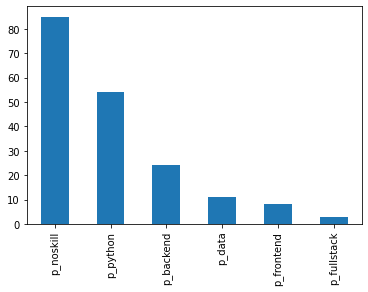

In [ ]:
pprofile['prog_clus'].value_counts().plot.bar()

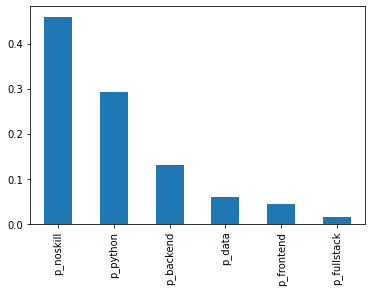

In [ ]:
pprofile['prog_clus'].value_counts(normalize=True).plot.bar()

###สรุปเรื่อง programming
- มีกลุ่มคนที่ไม่มีพื้นฐานการเขียนโปรแกรม
- มีกลุ่มคนที่มีพื้นฐานการเขียน python
- พอจะสรุปได้หรือเปล่าว่า python เป็นภาษายอดนิยมสำหรับคนที่สนใจ data science หรือเกิดจาก bias เพราะเราสอนโดยใช้ colab

##3.3 ความคาดหวัง



In [ ]:
# ดึงข้อมูลเกี่ยวกับความคาดหวังที่นักเรียนกรอกในแบบสอบถาม
expec = dat[['ความคาดหวังจากการมาเรียน']]

In [ ]:
expec.head()

,ความคาดหวังจากการมาเรียน
1,ได้รับความรู้เพิ่มเติม และเพิ่มทักษะความเชี่ยวชาญ สนใจด้าน AI
2,ไม่มี
4,เข้าใจหลักการและสามารถไปทำงานได้จริง\nหารายได้เสริมจากงานประจำ
7,สามารถนำความรู้ไปใช้ในการทำงานได้
8,สามารถนำความรู้ไป deploy เป็น project ใน real world ได้ และได้รับความรู้ที่จะนำไปต่อยอดต่อไป


In [ ]:
import botnoiw2v as bw
import numpy as np
expecDat = np.vstack([bw.sentencevector(e) for e in expec['ความคาดหวังจากการมาเรียน'].values])
expecDat

array([[-2.6705072 , -0.08424536,  0.34479514, ..., -0.65202326,
        -0.13609473,  0.42992797],
       [-0.6749233 ,  0.39450586, -1.6126351 , ..., -0.85770005,
        -2.35651   ,  1.9502959 ],
       [-2.0944204 , -0.19446138, -0.12975982, ..., -0.552304  ,
        -0.2864304 ,  0.36886498],
       ...,
       [-3.0999556 ,  0.05304547, -0.20765693, ..., -0.03649814,
        -0.09271038, -0.2919874 ],
       [-1.2478743 ,  0.6114437 , -0.16185263, ..., -0.30160537,
        -1.1233246 ,  0.82324773],
       [-2.206149  ,  0.10026708, -0.45609388, ..., -0.11235087,
        -0.2317038 , -0.01608412]], dtype=float32)

In [ ]:
chickerice_vertor = bw.sentencevector('ข้าวมันไก่')
porkrice_vertor = bw.sentencevector('ข้าวขาหมู')
train_vertor = bw.sentencevector('สถานีรถไฟ')
#ประโยคที่มีความหมายใกล้กันค่าจะใกล้กัน


In [ ]:
sum((chickerice_vertor - porkrice_vertor)**2)#หาระยะห่างระหว่างจุด

80.0719420351088

In [ ]:
sum((train_vertor - chickerice_vertor)**2)

75.82206651824526

In [ ]:
# แบ่งกลุ่มความคาดหวังด้วย K-means
pd.set_option('display.max_colwidth', 100)
eclus = KMeans(n_clusters=4, random_state=0).fit_predict(expecDat)
expec['eclus'] = eclus
expec

,ความคาดหวังจากการมาเรียน,eclus
1,ได้รับความรู้เพิ่มเติม และเพิ่มทักษะความเชี่ยวชาญ สนใจด้าน AI,2
2,ไม่มี,0
4,เข้าใจหลักการและสามารถไปทำงานได้จริง\nหารายได้เสริมจากงานประจำ,2
7,สามารถนำความรู้ไปใช้ในการทำงานได้,1
8,สามารถนำความรู้ไป deploy เป็น project ใน real world ได้ และได้รับความรู้ที่จะนำไปต่อยอดต่อไป,2
12,มีความรู้ Python Data Sci,3
13,สามารถนำความรู้ที่ได้ไปลองปรับใช้ในงานวิจัย และสามารถมีความรู้ที่จะนำไปสมัครงานทางด้าน data scie...,2
14,เข้าใจภาพรวม Data science มากขึ้นและได้ลงมือทำงานจริงจากความรู้ที่ได้เรียน,0
15,นำไปใช้ทำงานเป็นอาชีพได้จริงๆ,0
16,สามารถวิเคราะห์และเล่นกับ data ได้อย่างเชี่ยวชาญมากขึ้น ผ่านฟังก์ชันของโปรแกรมต่างๆ ที่เกี่ยวข้อง,2


In [ ]:
# แสดงข้อความใน cluster = 0
expec[expec['eclus']==0]

,ความคาดหวังจากการมาเรียน,eclus
2,ไม่มี,0
14,เข้าใจภาพรวม Data science มากขึ้นและได้ลงมือทำงานจริงจากความรู้ที่ได้เรียน,0
15,นำไปใช้ทำงานเป็นอาชีพได้จริงๆ,0
19,ได้เพิ่มทักษะเรียนรู้อะไรใหม่ๆ และได้รู้จักเพื่อนๆเพิ่ม,0
20,สามารถเขียนบอต ที่ฉลาดประมาณนึงได้,0
21,ได้ใช้งานจริง มีตัวอย่างให้ได้ทำ และได้ใช้สมัครงานครับ,0
23,สามารถเอาความรู้ไปใช้ต่อยอดในงานที่ตัวเองทำอยู่ได้ รวมถึงเอาไปใช้ปรับปรุงธุรกิจปัจจุบันที่ทำ,0
27,สามารถอ่านโค้ดได้พอประมาณและเข้าใจกระบวนการคำนวณข้อมูลมาใช้ให้เกิดประโยชน์,0
28,สามารถช่วยเพื่อนเขียนโปรแกรมเพื่อพัฒนาต่อยอด Application ได้,0
36,สามารถนำความรู้ไปใช้งานได้จริง และประยุกต์กับตัวงานที่ทำอยู่,0


In [ ]:
# แสดงข้อความใน cluster = 1
expec[expec['eclus']==1]

,ความคาดหวังจากการมาเรียน,eclus
7,สามารถนำความรู้ไปใช้ในการทำงานได้,1
33,สามารถนำDatascience มาใช้ในการพัฒนาระบบที่ดีขึ้นได้,1
35,ผมคาดหวังว่า การได้เรียนในคลาส DataScienceEssential รุ่นที่ 2 จะทำให้ผมได้มีความรู้ความเข้าใจเกี...,1
37,อยากได้ความรู้เพิ่มเติมให้เพียงพอที่จะสามารถยืนในสายงานนี้ได้,1
43,ต้องการพัฒนาความรู้ และนำความรู้ไปใช้ในองค์กร,1
44,สามารถนำมาต่อยอดพัฒนาแอพ หรืออื่นในสั่งที่สนใจได้,1
54,สามารถนำมาใช้ในการทำงานได้,1
55,มีความรู้และความเข้าใจอย่างถ่องแท้ และประยุกต์ใช้​ในงานที่ทำได้อย่างมีประสิทธิภาพ​,1
63,ได้เข้าใจวิธีการนำข้อมูลมาใช้ในทางธุรกิจ\nและความรู้ที่จะนำไปพัฒนาตนเอง,1
66,นำไปสร้างรายได้,1


In [ ]:
# แสดงข้อความใน cluster = 2
expec[expec['eclus']==2]

,ความคาดหวังจากการมาเรียน,eclus
1,ได้รับความรู้เพิ่มเติม และเพิ่มทักษะความเชี่ยวชาญ สนใจด้าน AI,2
4,เข้าใจหลักการและสามารถไปทำงานได้จริง\nหารายได้เสริมจากงานประจำ,2
8,สามารถนำความรู้ไป deploy เป็น project ใน real world ได้ และได้รับความรู้ที่จะนำไปต่อยอดต่อไป,2
13,สามารถนำความรู้ที่ได้ไปลองปรับใช้ในงานวิจัย และสามารถมีความรู้ที่จะนำไปสมัครงานทางด้าน data scie...,2
16,สามารถวิเคราะห์และเล่นกับ data ได้อย่างเชี่ยวชาญมากขึ้น ผ่านฟังก์ชันของโปรแกรมต่างๆ ที่เกี่ยวข้อง,2
22,มีความรู้ความสามารถทางด้าน Data Science ที่สามารถนำมาปฏิบัติงานจริงได้,2
24,สามารถเข้าใจพื้นฐานของ ML อย่างแตกฉาน,2
25,"ได้รับความรู้จากประสบการณ์จริง ได้ลงมือทำโปรเจคจริงๆด้วยตัวเองตั้งแต่ 0 ถึง 100, ได้ทำความเข้าใจ...",2
26,ต้องการมีความเข้าใจพื้นฐาน Data Science และตั้งใจจะทำ workshop ด้วยตัวเองทุกครั้ง เพื่อให้เข้าใจ...,2
32,"ได้ความรู้ครอบคลุมทุกด้านของการเป็น data scientist, สามารถเริ่มทำงานจริงในบริษัทในสายงานนี้ได้, ...",2


In [ ]:
# แสดงข้อความใน cluster = 3
expec[expec['eclus']==3]

,ความคาดหวังจากการมาเรียน,eclus
12,มีความรู้ Python Data Sci,3
31,สามารถเรียนรู้ต่อยอด จาก kaggle dataset หรือ data.go.th เองได้,3
52,To understand more about AI/ML from experts,3
59,Knowledge for Strategic And Planning,3
68,develop skill,3
82,"รู้ทักษะ Chatbot, LINE API, AI, Machine Learning",3
111,"I expects to have a new knowledges in AI or machine learning, real experiences about build AI or...",3
124,น่าจะได้ logic + experiences,3
133,ต่อยอดความเข้าใจ data science,3
212,อยากเป็น padawan ครับ :D,3


In [ ]:
#'expect_apply','expect_experience','expect_concept','expect_other'
expec['eclus'] = expec['eclus'].replace(0,'expect_apply')
expec['eclus'] = expec['eclus'].replace(1,'expect_concept')
expec['eclus'] = expec['eclus'].replace(2,'expect_experience')
expec['eclus'] = expec['eclus'].replace(3,'expect_other')
expec

,ความคาดหวังจากการมาเรียน,eclus
1,ได้รับความรู้เพิ่มเติม และเพิ่มทักษะความเชี่ยวชาญ สนใจด้าน AI,expect_experience
2,ไม่มี,expect_apply
4,เข้าใจหลักการและสามารถไปทำงานได้จริง\nหารายได้เสริมจากงานประจำ,expect_experience
7,สามารถนำความรู้ไปใช้ในการทำงานได้,expect_concept
8,สามารถนำความรู้ไป deploy เป็น project ใน real world ได้ และได้รับความรู้ที่จะนำไปต่อยอดต่อไป,expect_experience
12,มีความรู้ Python Data Sci,expect_other
13,สามารถนำความรู้ที่ได้ไปลองปรับใช้ในงานวิจัย และสามารถมีความรู้ที่จะนำไปสมัครงานทางด้าน data scie...,expect_experience
14,เข้าใจภาพรวม Data science มากขึ้นและได้ลงมือทำงานจริงจากความรู้ที่ได้เรียน,expect_apply
15,นำไปใช้ทำงานเป็นอาชีพได้จริงๆ,expect_apply
16,สามารถวิเคราะห์และเล่นกับ data ได้อย่างเชี่ยวชาญมากขึ้น ผ่านฟังก์ชันของโปรแกรมต่างๆ ที่เกี่ยวข้อง,expect_experience


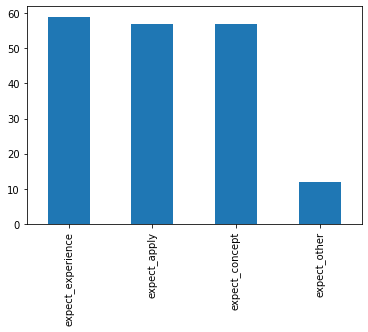

In [ ]:
expec['eclus'].value_counts().plot.bar()

###สรุปเรื่อง ความคาดหวัง
- แบ่งเป็น 3 กลุ่ม 
1.   กลุ่มที่อยากประยุกต์ใช้งาน คาดว่าน่าจะเป็น programmer หรืออยู่สาย data
2.   กลุ่มที่อยากฟังประสบการณ์ คาดว่าน่าจะเป็น data analyst/scientist ที่อยากฟังประสบการณ์เพื่อให้เก่งขึ้น
3.   กลุ่มที่อยากได้ concept คาดว่าน่าจะเป็นบุคคลทั่วไปที่สนใจ อาจจะเป็นนักศึกษา หรือผู้บริหาร ที่อยากเข้าใจว่า data science คืออะไร

In [ ]:
# แปลง cluster ให้เป็น One-hot
expectdf = pd.get_dummies(expec['eclus'])
expectdf.columns = ['expect_apply','expect_conecpt','expect_experience','expect_other']
expectdf.describe()

,expect_apply,expect_conecpt,expect_experience,expect_other
count,185.000000,185.000000,185.000000,185.000000
mean,0.308108,0.308108,0.318919,0.064865
std,0.462964,0.462964,0.467322,0.246956
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


##3.4 ทำไมถึงมาเรียน

In [ ]:
studyreason = dat[['ทำไมถึงสนใจสมัครเรียน']]
studyreason

,ทำไมถึงสนใจสมัครเรียน
1,ประกอบการทำงานวิจัย
2,อยากหาความรู้เพิ่ม
4,สนใจทำอยากทำpart-time \nอยากรู้จัก community เกี่ยวกับสายงานนีัมากขึ้นและได้แนวคิด แนวทางปฎิบัติ...
7,อยากพัฒนาความรู้ด้าน data science
8,"อยากศึกษาเรื่องการทำ data analytics, หลักการ deploy project นอกจากนี้ project ของ #1 ที่มีการนำเ..."
12,อยากเอาความรู้ด้าน Python ไปใช้งาน Data Sci
13,มีความสนใจเปลี่ยนสายงานไปทำด้าน data science
14,รู้สึกว่าเป็นทักษะที่มีความสำคัญและจำเป็นอย่างมากในอนาคต
15,เปลี่ยนสายงานอาชีและพัฒนาทักษะการทำงาน
16,สนใจพัฒนาทักษะด้าน data science เพื่อต่อยอดการทำงานในเชิงบริษัทมากขึ้น


In [ ]:
from sklearn.preprocessing import normalize
reasonDat = np.vstack([bw.sentencevector(s) for s in studyreason['ทำไมถึงสนใจสมัครเรียน'].values])
reasonDat

array([[-2.911849  ,  0.34814796,  2.0503652 , ..., -1.4587144 ,
        -0.16586648, -0.6091272 ],
       [ 0.05875611,  0.19936317,  0.20575057, ..., -0.78435063,
        -1.8329453 , -0.6284497 ],
       [-1.4747602 , -0.0325236 ,  0.3721089 , ..., -0.14839685,
        -0.90270245,  0.30463415],
       ...,
       [-1.8703431 ,  0.17835708,  0.45024654, ..., -0.5881443 ,
        -0.21683626, -0.12888609],
       [-1.5234507 , -0.8607644 ,  0.3473821 , ...,  0.2756042 ,
         0.08627573,  0.6738933 ],
       [ 0.4264418 ,  1.495682  ,  1.2586007 , ..., -0.76714325,
        -1.7441666 , -0.11990814]], dtype=float32)

In [ ]:
rclus = KMeans(n_clusters=3, random_state=0).fit_predict(reasonDat)
studyreason['rclus'] = rclus
studyreason

,ทำไมถึงสนใจสมัครเรียน,rclus
1,ประกอบการทำงานวิจัย,1
2,อยากหาความรู้เพิ่ม,0
4,สนใจทำอยากทำpart-time \nอยากรู้จัก community เกี่ยวกับสายงานนีัมากขึ้นและได้แนวคิด แนวทางปฎิบัติ...,0
7,อยากพัฒนาความรู้ด้าน data science,1
8,"อยากศึกษาเรื่องการทำ data analytics, หลักการ deploy project นอกจากนี้ project ของ #1 ที่มีการนำเ...",2
12,อยากเอาความรู้ด้าน Python ไปใช้งาน Data Sci,2
13,มีความสนใจเปลี่ยนสายงานไปทำด้าน data science,2
14,รู้สึกว่าเป็นทักษะที่มีความสำคัญและจำเป็นอย่างมากในอนาคต,0
15,เปลี่ยนสายงานอาชีและพัฒนาทักษะการทำงาน,1
16,สนใจพัฒนาทักษะด้าน data science เพื่อต่อยอดการทำงานในเชิงบริษัทมากขึ้น,1


In [ ]:
studyreason[studyreason['rclus']==0]['ทำไมถึงสนใจสมัครเรียน'].values

array(['อยากหาความรู้เพิ่ม',
       'สนใจทำอยากทำpart-time \nอยากรู้จัก community เกี่ยวกับสายงานนีัมากขึ้นและได้แนวคิด แนวทางปฎิบัติจริงจากผู้มีประสบการณ์\u200bที่เคยทำงาน',
       'รู้สึกว่าเป็นทักษะที่มีความสำคัญและจำเป็นอย่างมากในอนาคต',
       'นำความรู้ไปประยุกต์ใช้ที่ทำงาน',
       'สนใจศาสตร์ด้าน data science มานานแล้วครับ แต่ไม่มีโอกาสได้เรียนจริงจังครับ อยากเรียนรู้เพื่อใช้กับงานจริงครับ',
       'อยากเรียนรู้และทำความเข้าใจ ML',
       'ต้องการยกระดับความรู้และพิสูจน์ตัวเอง อีกทั้งถ้าเป็นไปได้ก็อยากนำมาประยุกต์ใช้กับงานที่ทำอยู่ให้ได้ครับ',
       'ได้มีการพัฒนาโปรแกรม ด้านหลักทรัพย์ การเงิน กับเพื่อน ซึ่งเพื่อนเป็นโปรแกรมเมอร์ แต่เราสามารถแชร์ได้แค่ไอเดีย จึงสนใจอยากที่จะเขียนโปรแกรมได้เอง',
       'เพราะว่าผมกะว่าหลังจากเรียนจบจะไปเป็น data scientist เนื่องจากตอนปิดเทอมที่ผ่านมาก็ได้ไปฝึกงานที่บริษัท kbtg ในด้านนี้มาเหมือนและก็รู้สึกว่าตัวเองยังต้องเรียนรู้เพิ่มอีกเยอะ และคอร์สนี้รุ่นแรกก็ดูสนุกกันมากด้วย จากมีเดียมที่เขียนกันออกมาก็ดูจะรู้สึกได้ว่าได้เรียนและทำงานกันจริงๆ

In [ ]:
studyreason[studyreason['rclus']==1]['ทำไมถึงสนใจสมัครเรียน'].values

array(['ประกอบการทำงานวิจัย', 'อยากพัฒนาความรู้ด้าน data science',
       'เปลี่ยนสายงานอาชีและพัฒนาทักษะการทำงาน',
       'สนใจพัฒนาทักษะด้าน data science เพื่อต่อยอดการทำงานในเชิงบริษัทมากขึ้น',
       'อยากเปลี่ยนสายอาชีพและสนใจเรื่องของการทำ Automate Trading Cypto Currency และ สนใจเรื่องของ AI จึงอยากศึกษาเพิ่มเติมอย่างจริงจัง',
       'จากได้ติดตาม page BOTNOI และได้ดู course แล้ว เห็นว่า เนื้อหาค่อนข้างครอบคลุม และยิ่งเห็นการนำเสนอผลงานของรุ่นที่ 1 ทำให้รู้สีกว่า use case ต่าๆ เป็น use case ที่นำไปใช้ได้จริง หลากหลายกลุ่มธุรกิจ\nจึงสนใจสมัครเรียนกับบอทน้อย โดยเฉพาะการทำ workshop ที่น่าจะทำให้มีพื้นฐานที่เข้าใจเกี่ยวกับ Data Science มากขึ้น โดยเฉพาะเรื่องทำนายพฤติกรรมของลูกค้า และการทำนาย Fraud ที่จะสามารถนำมาปรับใช้ในโรงงานได้',
       'ต้องการเพิ่มสกิลติดตัวไว้ใช้ประกอบธุรกิจส่วนตัวหรือใช้ในการสมัครงาน',
       'อยากวิเคราะห์ข้อมูลให้เกิดประโยชน์ต่อสังคม เช่น การศึกษา , การโดยสารสาธารณะ , การท่องเที่ยว , สุขภาพกายและเงินของประชากรประเทศไทย',
       'สนใจเรียนรู้เกี่ยวกับ Datasci

In [ ]:
studyreason[studyreason['rclus']==2]['ทำไมถึงสนใจสมัครเรียน'].values

array(['อยากศึกษาเรื่องการทำ data analytics, หลักการ deploy project นอกจากนี้ project ของ #1 ที่มีการนำเสนอใน fb live และ  medium ก็น่าสนใจมากๆ ',
       'อยากเอาความรู้ด้าน Python ไปใช้งาน Data Sci',
       'มีความสนใจเปลี่ยนสายงานไปทำด้าน data science ',
       'อยากเริ่มต้นในสายงาน Data Science ครับ',
       'อยู่ใน กลุ่ม Botnoi AI & Data science classroom แล้วได้ลองอ่าน result ที่นักเรียนได้ทำ เลยอยากเรียนมากครับ',
       'เห็นจากคอร์ส super ai engineer', 'มีความสนใจงาน data scientist',
       'อยากเรียนรู้เรื่อง DataScrience , ML  เพื่อนำมาประยุกส์ใช้กับงานหรือในชีวิตประจำวัน',
       'Upskill ', 'To improve team products (satellite data)',
       'สนใจ Data Science & machine learning &Ai', 'Reskill and Upskill',
       'อยากพัฒนา Bot ด้าน HR', 'develop skill',
       'อยากเรียนรู้งานด้าน data science และ AI',
       'มีโปรแจคที่ต้องการจะทำ มันจำเป็นต้องรู้ทักษะ Chatbot, AI, Machine Learning',
       'สนใจงานเกี่ยวกับ data science',
       'เรียนรู้เพิ่มเติ่มเกี่ยวกับงาน data scie

In [ ]:
studyreason['rclus'] = studyreason['rclus'].replace(0,'reason_interested')
studyreason['rclus'] = studyreason['rclus'].replace(1,'reason_job')
studyreason['rclus'] = studyreason['rclus'].replace(2,'reason_apply')
studyreason

,ทำไมถึงสนใจสมัครเรียน,rclus
1,ประกอบการทำงานวิจัย,reason_job
2,อยากหาความรู้เพิ่ม,reason_interested
4,สนใจทำอยากทำpart-time \nอยากรู้จัก community เกี่ยวกับสายงานนีัมากขึ้นและได้แนวคิด แนวทางปฎิบัติ...,reason_interested
7,อยากพัฒนาความรู้ด้าน data science,reason_job
8,"อยากศึกษาเรื่องการทำ data analytics, หลักการ deploy project นอกจากนี้ project ของ #1 ที่มีการนำเ...",reason_apply
12,อยากเอาความรู้ด้าน Python ไปใช้งาน Data Sci,reason_apply
13,มีความสนใจเปลี่ยนสายงานไปทำด้าน data science,reason_apply
14,รู้สึกว่าเป็นทักษะที่มีความสำคัญและจำเป็นอย่างมากในอนาคต,reason_interested
15,เปลี่ยนสายงานอาชีและพัฒนาทักษะการทำงาน,reason_job
16,สนใจพัฒนาทักษะด้าน data science เพื่อต่อยอดการทำงานในเชิงบริษัทมากขึ้น,reason_job


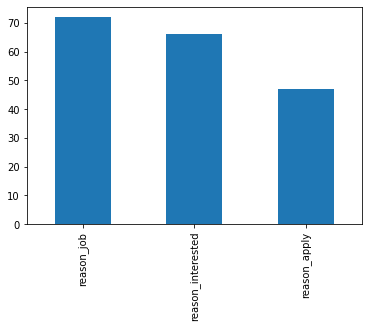

In [ ]:
studyreason['rclus'].value_counts().plot.bar()

###สรุปเรื่อง ความเหตุผลที่อยากเรียน
- แบ่งเป็น 3 กลุ่ม 
1.   กลุ่มที่มีความมุ่งมั่น 
2.   กลุ่มที่อยากจะเพิ่มความรู้ 
3.   กลุ่มที่สนใจ

##3.5 สถานที่เรียน/ทำงาน

In [ ]:
!unzip TH-Sarabun-New.zip

Archive:  TH-Sarabun-New.zip
replace THSarabunNew Bold.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: ััy
error:  invalid response [ััy]
replace THSarabunNew Bold.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: THSarabunNew Bold.ttf   
replace THSarabunNew BoldItalic.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: THSarabunNew BoldItalic.ttf  
replace THSarabunNew Italic.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: THSarabunNew Italic.ttf  
replace THSarabunNew.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: THSarabunNew.ttf        


In [ ]:
from wordcloud import WordCloud
from collections import Counter

path = '/content/THSarabunNew.ttf'
textList = dat['สถานที่ทำงาน/เรียน '].values
textList = [t.replace('\u200b','') for t in textList]
word_cloud_dict=Counter(textList)
word_cloud_dict

Counter({'(Freelance)': 1,
         '-': 2,
         'AGC ': 1,
         'AIS': 1,
         'ANCBROKER': 1,
         'AirAsia': 1,
         'Alphametrics Co., Ltd.': 1,
         'Amity': 1,
         'Ananda Development Public Company limited': 1,
         'BOI': 1,
         'Backyard ': 1,
         'Backyard Co., Ltd': 1,
         'Bank': 1,
         'BluePi company': 1,
         'C.H.H. Industry co., ltd.': 1,
         'CDG': 1,
         'CPALL public company limited': 1,
         'CPF': 1,
         'Carabao': 1,
         'Chulalongkorn University': 1,
         'Deeple': 1,
         'Digix': 1,
         'ENAC, toulouse, France': 1,
         'Eat well concept co.,ltd': 1,
         'Ericsson (Thailand) Ltd.': 1,
         'Esso (Thailand)': 1,
         'FRONTIS': 1,
         'Gistda': 1,
         'Indigy': 1,
         'Italian-Thai development plc.': 1,
         'J&T express': 1,
         'KBTG': 1,
         'KMITL': 2,
         'Kincentric': 1,
         'King Power ': 1,
         'Kmutt

In [ ]:
word_cloud_dict

Counter({'(Freelance)': 1,
         '-': 2,
         'AGC ': 1,
         'AIS': 1,
         'ANCBROKER': 1,
         'AirAsia': 1,
         'Alphametrics Co., Ltd.': 1,
         'Amity': 1,
         'Ananda Development Public Company limited': 1,
         'BOI': 1,
         'Backyard ': 1,
         'Backyard Co., Ltd': 1,
         'Bank': 1,
         'BluePi company': 1,
         'C.H.H. Industry co., ltd.': 1,
         'CDG': 1,
         'CPALL public company limited': 1,
         'CPF': 1,
         'Carabao': 1,
         'Chulalongkorn University': 1,
         'Deeple': 1,
         'Digix': 1,
         'ENAC, toulouse, France': 1,
         'Eat well concept co.,ltd': 1,
         'Ericsson (Thailand) Ltd.': 1,
         'Esso (Thailand)': 1,
         'FRONTIS': 1,
         'Gistda': 1,
         'Indigy': 1,
         'Italian-Thai development plc.': 1,
         'J&T express': 1,
         'KBTG': 1,
         'KMITL': 2,
         'Kincentric': 1,
         'King Power ': 1,
         'Kmutt

In [ ]:
def genwordcloud(word_cloud_dict,regexp):
  wordcloud = WordCloud(
                        font_path=path, 
                        relative_scaling = 0.3,
                        min_font_size=1,
                        background_color="white",
                        width=1024,
                        height=768,
                        max_words=2000, 
                        colormap='plasma', 
                        scale=3,
                        font_step=4,
                        regexp=regexp,
                      #   contour_width=3, 
                      #   contour_color='steelblue', 
                        collocations=False,
                        margin=2
                        ).generate_from_frequencies(word_cloud_dict)
  import pylab as plt
  fig, ax = plt.subplots(1, 1, figsize=(16, 12))
  ax.imshow(wordcloud, interpolation='bilinear')
  ax.axis("off")
  fig.show()

In [ ]:
def remove_key(word_cloud_dict,keyList):
  wcd = word_cloud_dict.copy()
  kw = list(wcd.keys())
  for w in kw:
    for s in sList: 
      if (w.find(s)!=-1):
        try:
          wcd.pop(w)
        except:
          pass  
  return wcd

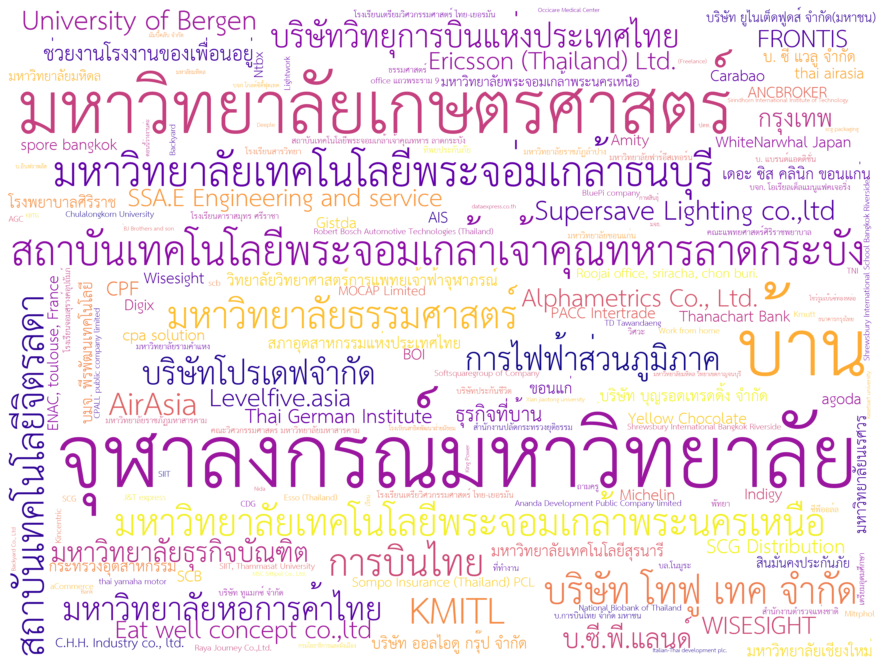

In [ ]:
regexp=r"\w[\w' ]+"
genwordcloud(word_cloud_dict,regexp)

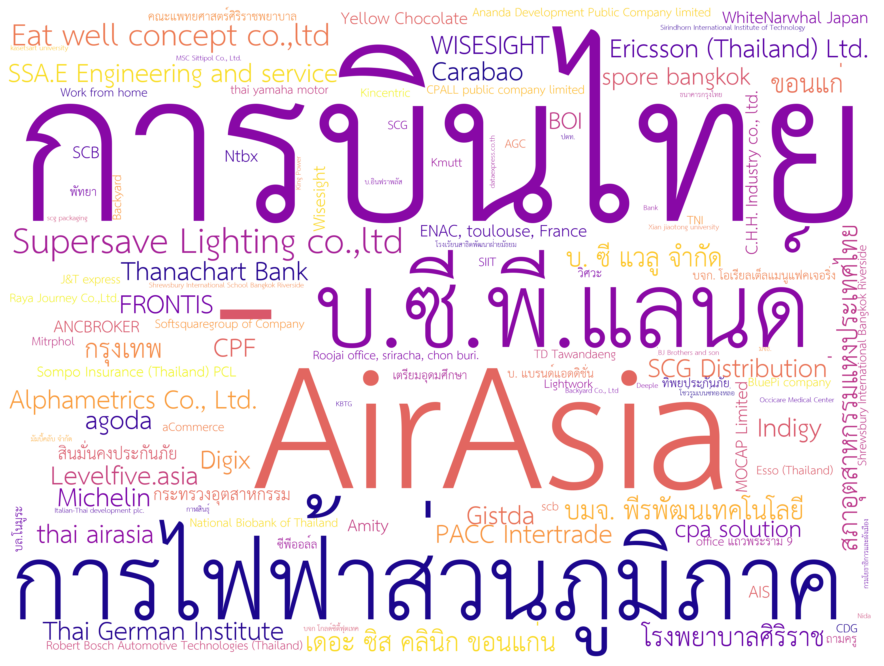

In [ ]:
sList = ['KMITL','ชลบุรี','ม.','มหา','เกษตร','จุฬา','อารี','ศิลป','บาง','สุขุม','Free','คลอง','สจล','Rmu','กำลัง','Non','บอทน้อย','N/A','Botnoi','ไม่','บริษัท','สถาบัน','Uni','KMUTT','อิสระ','บ้าน','งาน','เรียน','FREE','ธรรม','วิทยา']
wcd = remove_key(word_cloud_dict,sList)
regexp=r"\w[\w' ]+"
genwordcloud(wcd,regexp)

###สรุปเรื่อง สถานที่หน่วยงานที่มาเรียน
- แบ่งเป็น 2 กลุ่มหลัก
1. บริษัทองค์กร ที่มีหลากหลายภาคธุรกิจ
2. มหาวิทยาลัย

หน่วยงานเกี่ยวกับการบินมาสมัครเรียนเยอะ

##3.6 อาชีพ

In [ ]:
# list อาชีพ ของผู้ที่ผ่านการคัดเลือก
#dat['อาชีพ']
dat['อาชีพ'].value_counts()

นักศึกษา                                         31
พนักงานบริษัท                                    11
นักเรียน                                         11
ธุรกิจส่วนตัว                                     7
วิศวกร                                            5
รับราชการ                                         4
ว่างงาน                                           3
อาจารย์                                           3
-                                                 2
เจ้าของธุรกิจ                                     2
Data Scientist                                    2
software engineer                                 2
โปรแกรมเมอร์                                      2
Engineer                                          2
พนักงานเอกชน                                      2
Programmer                                        2
เจ้าหน้าที่ภูมิสารสนเทศ                           1
การตลาด                                           1
Performance Marketer                              1
พนักงานขาย ต

In [ ]:
# หา vector ของแต่ละอาชีพ
import numpy as np
ovec = np.vstack([bw.sentencevector(d) for d in dat['อาชีพ'].values])
ovec

array([[-1.4809835 ,  0.64978856,  2.75212717, ...,  0.56286824,
         0.81444758, -0.04740966],
       [-1.3033098 , -0.83897012, -2.48879147, ...,  2.2512424 ,
        -6.3190465 ,  2.55566502],
       [-3.57939363,  1.95088887,  0.92199051, ...,  0.16997671,
        -2.77540112,  0.66942489],
       ...,
       [-0.50586033, -1.29383957,  0.27607718, ...,  0.2930575 ,
         1.21879292,  0.71238887],
       [ 0.04187579,  0.03975995,  0.18828724, ..., -0.1032038 ,
         0.03884769, -0.35882199],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
# แบ่ง cluster ของกลุ่มอาชีพ ด้วย K-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=10).fit(ovec)
ocClus = kmeans.predict(ovec)

In [ ]:
# create dataframe for occupation 0cluster analysis
occdat = dat[['อาชีพ']]
occdat['กลุ่มอาชีพ'] = ocClus

In [ ]:
# display each occupation cluster
occdat[occdat['กลุ่มอาชีพ']==7].sample(1)
#['it/data','en','co','ust','pm','st','te','none']

,อาชีพ,กลุ่มอาชีพ
4,พนักงานรัฐวิสาหกิจ​,7


In [ ]:
occdat['กลุ่มอาชีพ'] = occdat['กลุ่มอาชีพ'].replace(0,'unistudent')
occdat['กลุ่มอาชีพ'] = occdat['กลุ่มอาชีพ'].replace(1,'owner & employee')
occdat['กลุ่มอาชีพ'] = occdat['กลุ่มอาชีพ'].replace(2,'tech')
occdat['กลุ่มอาชีพ'] = occdat['กลุ่มอาชีพ'].replace(3,'professional')
occdat['กลุ่มอาชีพ'] = occdat['กลุ่มอาชีพ'].replace(4,'school')
occdat['กลุ่มอาชีพ'] = occdat['กลุ่มอาชีพ'].replace(5,'others')
occdat['กลุ่มอาชีพ'] = occdat['กลุ่มอาชีพ'].replace(6,'others')
occdat['กลุ่มอาชีพ'] = occdat['กลุ่มอาชีพ'].replace(7,'others')


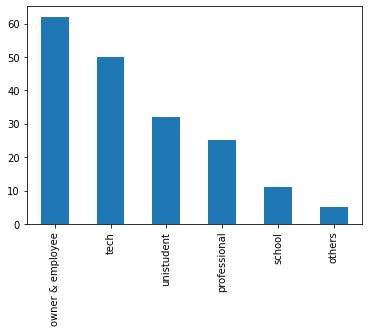

In [ ]:
occdat['กลุ่มอาชีพ'].value_counts().plot.bar()

In [ ]:
textList = list(occdat[occdat['กลุ่มอาชีพ']=='owner & employee']['อาชีพ'].values)
wcd = Counter(textList)
wcd

Counter({'Analyst': 1,
         'Employee': 1,
         'Engineer': 2,
         'IT': 1,
         'Presale': 1,
         'Programmer': 2,
         'employee': 1,
         'engineer': 1,
         'marketer': 1,
         'system analysis': 1,
         'ธุรการ': 1,
         'ธุรกิจส่วนตัว': 7,
         'นักธุรกิจ': 1,
         'นักพัฒนาซอร์ฟแวร์': 1,
         'นักวิจัย': 1,
         'นักวิชาการ': 1,
         'นักวิชาการเวชสถิติ': 1,
         'นักวิเคราะห์วางแผนสั่งซื้อ': 1,
         'นักศึกษา ปริญญาโท': 1,
         'นักษ': 1,
         'นิสิต': 1,
         'ผู้ช่วยนักวิจัย': 1,
         'พนักงานบริษัท': 11,
         'พนักงานประจำ': 1,
         'รองผู้จัดการฝ่ายไอที': 1,
         'รับราชการ': 4,
         'ลูกเรือ': 1,
         'วิศวกร': 5,
         'วิศวกรน้ำมันหล่อลื่น': 1,
         'วิศวกรเครื่องกล': 1,
         'วิศวกรโยธา': 1,
         'ว่างงาน': 3,
         'สถาปนิก': 1,
         'โปรแกรมเมอร์': 2})

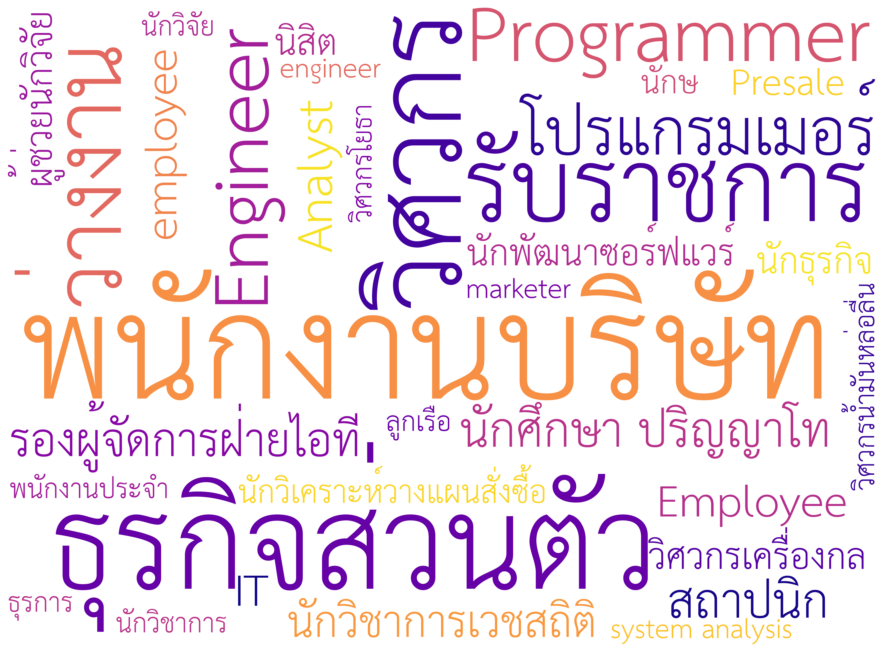

In [ ]:
regexp=r"\w[\w' ]+"
genwordcloud(wcd,regexp)

###สรุปเรื่อง อาชีพ
- อาจจะต้องแบ่งกลุ่มให้เยอะกว่านี้ หรืออาจจะต้องใช้คนมาช่วยแบ่งกลุ่มอาชีพ และใช้ supervise learning ที่จะได้เรียนในคราวถัดไป

##3.7 รวมข้อมูลเพื่อสร้าง DataMart

In [ ]:
datage = datage.reset_index()
pprofile = pprofile.reset_index()
expec = expec.reset_index()
studyreason = studyreason.reset_index()
occdat = occdat.reset_index()
datamart = pd.concat([datage[['อายุ']],pprofile[['prog_clus']],expec[['eclus']],studyreason[['rclus']],occdat[['กลุ่มอาชีพ']]],axis=1)
datamart.head()

,อายุ,prog_clus,eclus,rclus,กลุ่มอาชีพ
0,30-40,p_noskill,expect_experience,reason_job,unistudent
1,>40,p_backend,expect_apply,reason_interested,others
2,20-30,p_python,expect_experience,reason_interested,others
3,30-40,p_noskill,expect_concept,reason_job,professional
4,20-30,p_python,expect_experience,reason_apply,owner & employee


In [ ]:
dat.iloc[11]

Timestamp                                                                                                                 9/21/2020 14:48:28
สะดวกเรียนช่วงเวลาไหน                                                                                  จันทร์ ถึง ศุกร์ เวลา 10:00 ถึง 18:00
อายุ                                                                                                                              30 - 40 ปี
อาชีพ                                                                                                                               IT admin
สถานที่ทำงาน/เรียน                                                                                                                   กรุงเทพ
สาขาที่เรียนจบ / กำลังศึกษา                                                                                     คอมพิวเตอร์ศึกษา (ครุศาสตร์)
มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน            ไม่มี พอได้ภาษา HTML นิดหน่อย
ได้ผ่านการเรี

# 4. การหาคำตอบจากข้อมูล

##4.1 ความคาดหวังของคนเรียน

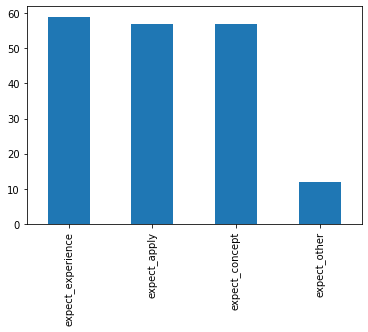

In [ ]:
datamart['eclus'].value_counts().plot.bar()

##4.2 เหตุผลที่เรียน

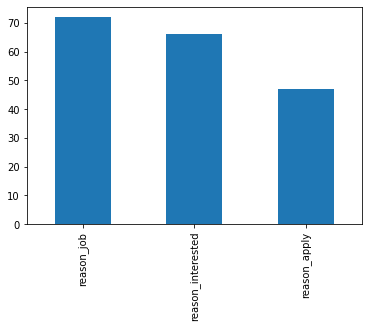

In [ ]:
datamart['rclus'].value_counts().plot.bar()

##4.3 พื้นฐานเขียนโปรแกรม

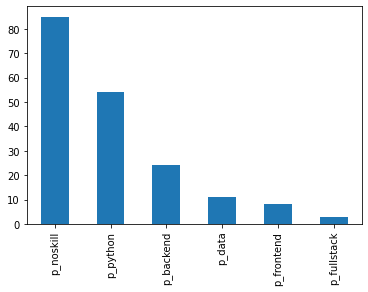

In [ ]:
datamart['prog_clus'].value_counts().plot.bar()

##4.4 ช่วงอายุคนเรียน

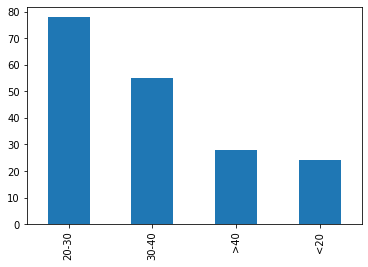

In [ ]:
datamart['อายุ'].value_counts().plot.bar()

##4.5 อาชีพ

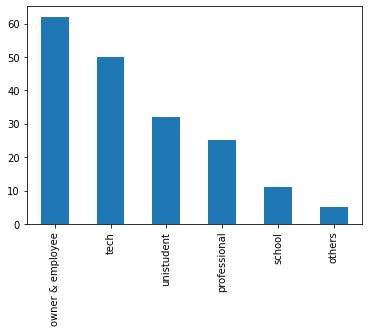

In [ ]:
datamart['กลุ่มอาชีพ'].value_counts().plot.bar()

##สรุป ความสำคัญของการสร้าง data mart
- หากข้อมูลเรามีการอัพเดท เราก็สามารถวิเคราะห์ข้อมูล เทรนใหม่ ได้อย่างรวดเร็ว
- สามารถไปสร้าง dashboard ที่เป็น real-time ก็ได้
- หัวใจของ data analytic อยู่ที่ data mart ทำได้ครบถ้วน แค่ไหน

# 5. ชุดคำถามใหม่หลังจากเห็นผลลัพธ์แรก

In [ ]:
pd.crosstab(datamart['eclus'],datamart['prog_clus'])

prog_clus,p_backend,p_data,p_frontend,p_fullstack,p_noskill,p_python
eclus,,,,,,
expect_apply,9,3,3,0,28,14
expect_concept,8,2,4,2,26,15
expect_experience,6,6,0,1,26,20
expect_other,1,0,1,0,5,5


In [ ]:
pd.crosstab(datamart['eclus'],datamart['prog_clus'],normalize=0).drop('expect_other')

prog_clus,p_backend,p_data,p_frontend,p_fullstack,p_noskill,p_python
eclus,,,,,,
expect_apply,0.157895,0.052632,0.052632,0.000000,0.491228,0.245614
expect_concept,0.140351,0.035088,0.070175,0.035088,0.456140,0.263158
expect_experience,0.101695,0.101695,0.000000,0.016949,0.440678,0.338983


In [ ]:
pd.crosstab(datamart['eclus'],datamart['prog_clus'],normalize=1).drop('expect_other')

prog_clus,p_backend,p_data,p_frontend,p_fullstack,p_noskill,p_python
eclus,,,,,,
expect_apply,0.375000,0.272727,0.375,0.000000,0.329412,0.259259
expect_concept,0.333333,0.181818,0.500,0.666667,0.305882,0.277778
expect_experience,0.250000,0.545455,0.000,0.333333,0.305882,0.370370


In [ ]:
pd.crosstab(datamart['อายุ'],datamart['prog_clus'])

prog_clus,p_backend,p_data,p_frontend,p_fullstack,p_noskill,p_python
อายุ,,,,,,
20-30,3,7,1,1,31,35
30-40,10,3,4,1,29,8
<20,6,0,3,1,8,6
>40,5,1,0,0,17,5


In [ ]:
pd.crosstab(datamart['อายุ'],datamart['prog_clus'],normalize=1) #ไม่มีประโยชน์ เพราะ 20-30 คนสมัครเยอะ

prog_clus,p_backend,p_data,p_frontend,p_fullstack,p_noskill,p_python
อายุ,,,,,,
20-30,0.125000,0.636364,0.125,0.333333,0.364706,0.648148
30-40,0.416667,0.272727,0.500,0.333333,0.341176,0.148148
<20,0.250000,0.000000,0.375,0.333333,0.094118,0.111111
>40,0.208333,0.090909,0.000,0.000000,0.200000,0.092593


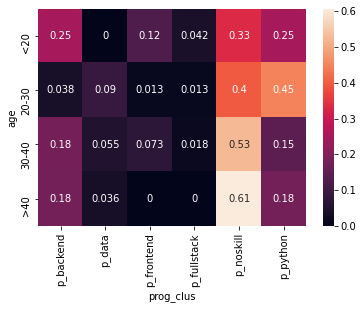

In [ ]:
datamart['age'] = datamart['อายุ']
ageXprog = pd.crosstab(datamart['age'],datamart['prog_clus'],normalize=0)
ageXprog = ageXprog.T[['<20','20-30','30-40','>40']].T
sns.heatmap(ageXprog, annot=True)

###สรุปผล อายุเทียบกับความสามารถในการเขียนโปรแกรม


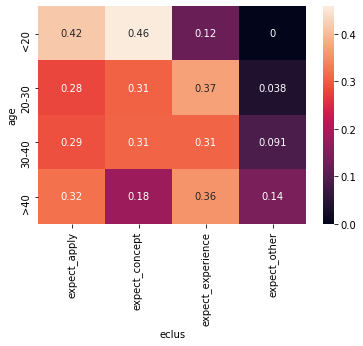

In [ ]:
pd.crosstab(datamart['กลุ่มอาชีพ'],datamart['prog_clus'],normalize=1)
ageXexpe = pd.crosstab(datamart['age'],datamart['eclus'],normalize=0)
ageXexpe = ageXexpe.T[['<20','20-30','30-40','>40']].T
sns.heatmap(ageXexpe, annot=True)

###สรุปผล อายุเทียบกับความคาดหวัง
- ยิ่งอายุน้อยยิ่งต้องการไอเดีย concept ผู้ใหญ่น่าจะเข้าใจ concept ได้ดีกว่า แต่อยากที่จะได้ฟังประสบการณ์ทำงานในสาย Data Science
- การประยุกต์ใช้งาน จะเป็นกลุ่มวัยคนทำงาน

# 6. สรุป
- data analytic มีความสำคัญอย่างมากในการหา insight เพื่อตอบคำถามทางธุรกิจเบื้องต้น
- ข้อจำกัดของ data analytic คือ การโต้ตอบกับมนุษย์ที่มองเห็นได้มากที่สุดเพียง 3 มิติเท่านั้น 
- เราจะใช้ data science ในการเข้าใจ data ที่เหนือกว่า 3 มิติ รวมถึงการสร้าง AI เพิ่มทำนายผลทางธุรกิจ



---



#backup

In [ ]:
# Concatenate original dataframe with datamart
dat_reset = dat.reset_index().drop('index', axis=1)
dat = pd.concat([dat_reset, datamart], axis=1) #concat กันในแนว columns
dat.head()

,Timestamp,สะดวกเรียนช่วงเวลาไหน,อายุ,อาชีพ,สถานที่ทำงาน/เรียน,สาขาที่เรียนจบ / กำลังศึกษา,มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน,ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคย เรียนคลาสไหนมา,ทำไมถึงสนใจสมัครเรียน,ความคาดหวังจากการมาเรียน,กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน,ชำระเงิน,อายุ,prog_clus,eclus,rclus,กลุ่มอาชีพ,age
0,9/19/2020 21:58:11,จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00,30 - 40 ปี,นักศึกษา,มหาวิทยาลัยหอการค้าไทย,มหาวิทยาลัยหอการค้าไทย,มี,ศึกษาเอง,ประกอบการทำงานวิจัย,ได้รับความรู้เพิ่มเติม และเพิ่มทักษะความเชี่ยวชาญ สนใจด้าน AI,Facebook,1.0,30-40,p_noskill,expect_experience,reason_job,unistudent,30-40
1,9/20/2020 7:38:33,"จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00, เสาร์ และ อาทิตย์ 09:00 ถึง 12:00",40 ปี ขึ้นไป,PM,บริษัทโปรเดฟจำกัด,พระจอมเกล้าธนบุรี,C#,Chatbot School รุ่นที่ 1,อยากหาความรู้เพิ่ม,ไม่มี,FB,1.0,>40,p_backend,expect_apply,reason_interested,others,>40
2,9/20/2020 8:08:24,จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00,20 - 30 ปี,พนักงานรัฐวิสาหกิจ​,บริษัท​วิทยุการบินแห่งประเทศไทย,"คณิตศาสตร์ประกันภัย, Business Analytic","Javascript, Python",Chatbot School รุ่นที่ 1,สนใจทำอยากทำpart-time \nอยากรู้จัก community เกี่ยวกับสายงานนีัมากขึ้นและได้แนวคิด แนวทางปฎิบัติ...,เข้าใจหลักการและสามารถไปทำงานได้จริง\nหารายได้เสริมจากงานประจำ,Botnoi Chatbot School #1,1.0,20-30,p_python,expect_experience,reason_interested,others,20-30
3,9/20/2020 8:55:30,เสาร์ และ อาทิตย์ 09:00 ถึง 12:00,30 - 40 ปี,พนักงานออฟฟิศ,AirAsia,Economics,ไม่มี,ไม่เคย,อยากพัฒนาความรู้ด้าน data science,สามารถนำความรู้ไปใช้ในการทำงานได้,จาก facebook ดร.วินน์,1.0,30-40,p_noskill,expect_concept,reason_job,professional,30-40
4,9/20/2020 9:08:17,จันทร์ ถึง ศุกร์ เวลา 10:00 ถึง 18:00,20 - 30 ปี,วิศวกร,การไฟฟ้าส่วนภูมิภาค,ไฟฟ้ากำลัง,"Python, C++, HTML, Javascript, CSS",ตามมาจาก Super AI Engineer,"อยากศึกษาเรื่องการทำ data analytics, หลักการ deploy project นอกจากนี้ project ของ #1 ที่มีการนำเ...",สามารถนำความรู้ไป deploy เป็น project ใน real world ได้ และได้รับความรู้ที่จะนำไปต่อยอดต่อไป,fb: Botnoi AI & Data science classroom,1.0,20-30,p_python,expect_experience,reason_apply,owner & employee,20-30


Gender

In [ ]:
def getGender(text):
  if 'คะ' in text or 'ค่ะ' in text:
    return 'Female'
  return 'Male'
  
dat['Gender'] = dat['ทำไมถึงสนใจสมัครเรียน'].apply(lambda x: getGender(x))
#or dat['ทำไมถึงสนใจสมัครเรียน'].apply(getGender(x))

In [ ]:
dat['Gender'].value_counts()

Male      175
Female     10
Name: Gender, dtype: int64

In [ ]:
dat['Gender'].head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: Gender, dtype: object

คนที่อยากเปลี่ยนสายงาน

In [ ]:
def wantToChangeCareer(text):
  if 'เปลี่ยนสาย' in text or 'หางาน' in text or 'สนใจ' in text:
    return True
  return False
  
dat['CarrierChange'] = dat['ทำไมถึงสนใจสมัครเรียน'].apply(lambda x: wantToChangeCareer(x))

In [ ]:
dat['CarrierChange'].value_counts()

False    119
True      66
Name: CarrierChange, dtype: int64

ได้ข่าวผ่านช่องทางไหน

In [ ]:
line =['line','botnoi','ไลน์','บอทน้อย']
text = 'จาก line ครับ'
list=[]
for word in line:
  list.append(word in text.lower())
print(list)

[True, False, False, False]


In [ ]:
def getChannel(text):
  line = ['line', 'botnoi', 'ไลน์', 'บอทน้อย']
  facebook = ['facebook', 'เฟส', 'fb', 'datarockie']
  twitter = ['twitter']

  if any(word in text.lower() for word in line):
    return 'Line'
  elif any(word in text.lower() for word in facebook):
    return 'Fackbook'
  elif any(word in text.lower() for word in twitter):
    return 'Twitter'
  else: 
    return 'N/A'

dat['Channel'] = dat['กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน'].apply(lambda x: getChannel(x))
dat['Channel']

0      Fackbook
1      Fackbook
2          Line
3      Fackbook
4          Line
5      Fackbook
6      Fackbook
7      Fackbook
8          Line
9           N/A
10          N/A
11     Fackbook
12     Fackbook
13         Line
14         Line
15          N/A
16         Line
17         Line
18          N/A
19     Fackbook
20         Line
21         Line
22     Fackbook
23         Line
24     Fackbook
25          N/A
26          N/A
27     Fackbook
28         Line
29     Fackbook
30     Fackbook
31     Fackbook
32          N/A
33     Fackbook
34     Fackbook
35          N/A
36     Fackbook
37          N/A
38          N/A
39     Fackbook
40     Fackbook
41     Fackbook
42     Fackbook
43         Line
44         Line
45          N/A
46         Line
47         Line
48     Fackbook
49         Line
50         Line
51         Line
52         Line
53          N/A
54     Fackbook
55     Fackbook
56     Fackbook
57         Line
58         Line
59         Line
60         Line
61          N/A
62      

In [ ]:
dat['Channel'].value_counts()

Fackbook    68
Line        68
N/A         49
Name: Channel, dtype: int64

# การวิเคราะห์สำหรับการลงทะเบียน

##รู้ข่าวห้องเรียน Botnoi ผ่านช่องทางไหน

          Channel
Fackbook       68
Line           68
N/A            49


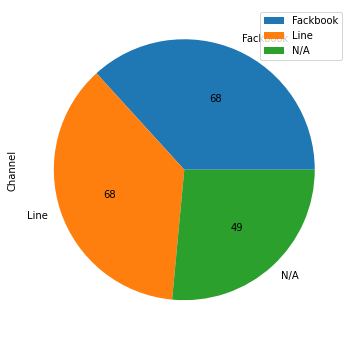

In [ ]:
Channel = pd.DataFrame(dat['Channel'].value_counts())
print(Channel)

i = [0]

def absolute_value(val):
    a  = Channel.iloc[i[0]%len(Channel), i[0]//len(Channel)]
    i[0] += 1
    return a

Channel.plot.pie(subplots=True, figsize=(12, 6), autopct=absolute_value);

##คนสมัครผ่านช่องทางไหน เวลาไหน

In [ ]:
dat['Timestamp'].head()

0    9/19/2020 21:58:11
1     9/20/2020 7:38:33
2     9/20/2020 8:08:24
3     9/20/2020 8:55:30
4     9/20/2020 9:08:17
Name: Timestamp, dtype: object

In [ ]:
text= '9/19/2020 21:58:11'
text.split(' ')

['9/19/2020', '21:58:11']

In [ ]:
text= '21:58:11'
txt = text.split(':')

In [ ]:
txt[0]

'21'

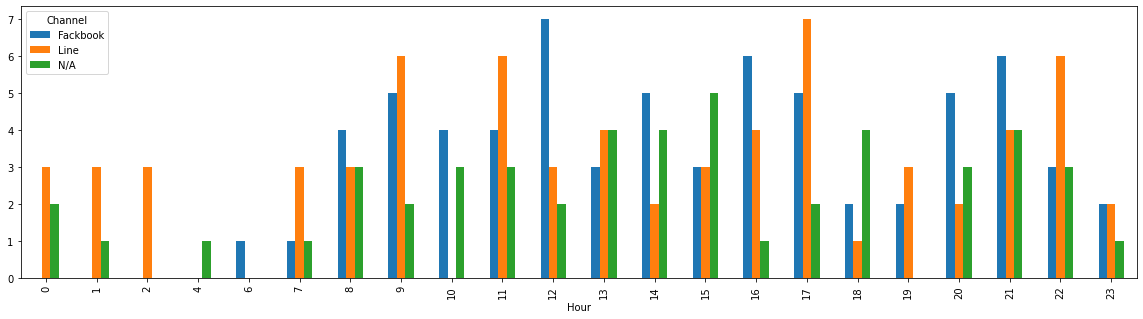

In [ ]:
dat[['Date','Time']] = dat['Timestamp'].apply(lambda x: pd.Series(x.split(' ')))
dat['Hour'] = dat.Time.apply(lambda x: x.split(':')[0]).astype(int) 
Channel_Time = pd.crosstab(dat.Hour,dat.Channel, dropna=False)
Channel_Time.plot.bar(figsize=(20,5))

##คนที่อยากมาทำงานด้าน Data Sci

       CarrierChange
False            119
True              66


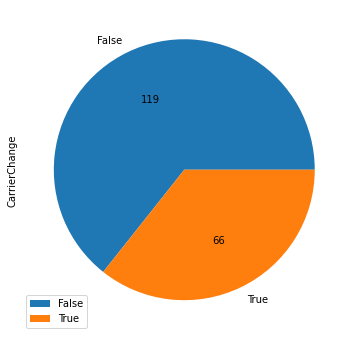

In [ ]:
CarrierChange = pd.DataFrame(dat['CarrierChange'].value_counts())
print(CarrierChange)

i = [0]

def absolute_value(val):
    a  = CarrierChange.iloc[i[0]%len(CarrierChange), i[0]//len(CarrierChange)]
    i[0] += 1
    return a

CarrierChange.plot.pie(subplots=True, figsize=(12, 6), autopct=absolute_value);

##กลุ่มไหนบ้างที่มีความสนใจอยากเปลี่ยนมาทำงานด้าน Data Sci

In [ ]:
dat['Gender'].value_counts()

Male      175
Female     10
Name: Gender, dtype: int64

In [ ]:
dat.head()

,Timestamp,สะดวกเรียนช่วงเวลาไหน,อายุ,อาชีพ,สถานที่ทำงาน/เรียน,สาขาที่เรียนจบ / กำลังศึกษา,มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน,ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคย เรียนคลาสไหนมา,ทำไมถึงสนใจสมัครเรียน,ความคาดหวังจากการมาเรียน,กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน,ชำระเงิน,อายุ,prog_clus,eclus,rclus,กลุ่มอาชีพ,age,Gender,CarrierChange,Channel,Date,Time,Hour
0,9/19/2020 21:58:11,จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00,30 - 40 ปี,นักศึกษา,มหาวิทยาลัยหอการค้าไทย,มหาวิทยาลัยหอการค้าไทย,มี,ศึกษาเอง,ประกอบการทำงานวิจัย,ได้รับความรู้เพิ่มเติม และเพิ่มทักษะความเชี่ยวชาญ สนใจด้าน AI,Facebook,1.0,30-40,p_noskill,expect_experience,reason_job,unistudent,30-40,Male,False,Fackbook,9/19/2020,21:58:11,21
1,9/20/2020 7:38:33,"จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00, เสาร์ และ อาทิตย์ 09:00 ถึง 12:00",40 ปี ขึ้นไป,PM,บริษัทโปรเดฟจำกัด,พระจอมเกล้าธนบุรี,C#,Chatbot School รุ่นที่ 1,อยากหาความรู้เพิ่ม,ไม่มี,FB,1.0,>40,p_backend,expect_apply,reason_interested,others,>40,Male,False,Fackbook,9/20/2020,7:38:33,7
2,9/20/2020 8:08:24,จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00,20 - 30 ปี,พนักงานรัฐวิสาหกิจ​,บริษัท​วิทยุการบินแห่งประเทศไทย,"คณิตศาสตร์ประกันภัย, Business Analytic","Javascript, Python",Chatbot School รุ่นที่ 1,สนใจทำอยากทำpart-time \nอยากรู้จัก community เกี่ยวกับสายงานนีัมากขึ้นและได้แนวคิด แนวทางปฎิบัติ...,เข้าใจหลักการและสามารถไปทำงานได้จริง\nหารายได้เสริมจากงานประจำ,Botnoi Chatbot School #1,1.0,20-30,p_python,expect_experience,reason_interested,others,20-30,Male,True,Line,9/20/2020,8:08:24,8
3,9/20/2020 8:55:30,เสาร์ และ อาทิตย์ 09:00 ถึง 12:00,30 - 40 ปี,พนักงานออฟฟิศ,AirAsia,Economics,ไม่มี,ไม่เคย,อยากพัฒนาความรู้ด้าน data science,สามารถนำความรู้ไปใช้ในการทำงานได้,จาก facebook ดร.วินน์,1.0,30-40,p_noskill,expect_concept,reason_job,professional,30-40,Male,False,Fackbook,9/20/2020,8:55:30,8
4,9/20/2020 9:08:17,จันทร์ ถึง ศุกร์ เวลา 10:00 ถึง 18:00,20 - 30 ปี,วิศวกร,การไฟฟ้าส่วนภูมิภาค,ไฟฟ้ากำลัง,"Python, C++, HTML, Javascript, CSS",ตามมาจาก Super AI Engineer,"อยากศึกษาเรื่องการทำ data analytics, หลักการ deploy project นอกจากนี้ project ของ #1 ที่มีการนำเ...",สามารถนำความรู้ไป deploy เป็น project ใน real world ได้ และได้รับความรู้ที่จะนำไปต่อยอดต่อไป,fb: Botnoi AI & Data science classroom,1.0,20-30,p_python,expect_experience,reason_apply,owner & employee,20-30,Male,True,Line,9/20/2020,9:08:17,9


In [ ]:
pd.crosstab(dat['Gender'],WorkCategories_CarrierChange, dropna=False)

กลุ่มอาชีพ,others,owner & employee,professional,school,tech,unistudent
Gender,,,,,,
Female,0,0,1,0,1,1
Male,1,20,10,3,16,13


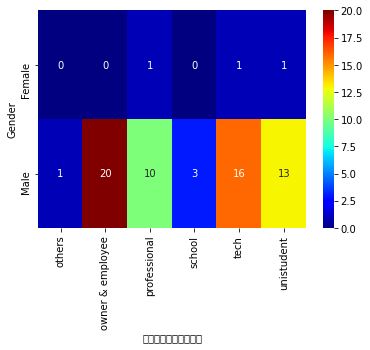

In [ ]:
WorkCategories_CarrierChange = dat['กลุ่มอาชีพ'].loc[dat['CarrierChange']==True]
sns.heatmap(pd.crosstab(dat['Gender'],WorkCategories_CarrierChange, dropna=False), \
            annot=True, fmt="g", cmap='jet')

##Info ทำไมถึงสนใจสมัครเรียน

In [ ]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
!gdown --id 1KFeMUzqRNkkOQ3m4oeoorkN4EJGe9JwF

Downloading...
From: https://drive.google.com/uc?id=1KFeMUzqRNkkOQ3m4oeoorkN4EJGe9JwF
To: /content/THSarabunNew Bold.ttf
100% 361k/361k [00:00<00:00, 51.6MB/s]


In [ ]:
textList = dat['ทำไมถึงสนใจสมัครเรียน'].fillna('')

textList = ' '.join(textList)
textList

"ประกอบการทำงานวิจัย อยากหาความรู้เพิ่ม สนใจทำอยากทำpart-time \nอยากรู้จัก community เกี่ยวกับสายงานนีัมากขึ้นและได้แนวคิด แนวทางปฎิบัติจริงจากผู้มีประสบการณ์\u200bที่เคยทำงาน อยากพัฒนาความรู้ด้าน data science อยากศึกษาเรื่องการทำ data analytics, หลักการ deploy project นอกจากนี้ project ของ #1 ที่มีการนำเสนอใน fb live และ  medium ก็น่าสนใจมากๆ  อยากเอาความรู้ด้าน Python ไปใช้งาน Data Sci มีความสนใจเปลี่ยนสายงานไปทำด้าน data science  รู้สึกว่าเป็นทักษะที่มีความสำคัญและจำเป็นอย่างมากในอนาคต เปลี่ยนสายงานอาชีและพัฒนาทักษะการทำงาน สนใจพัฒนาทักษะด้าน data science เพื่อต่อยอดการทำงานในเชิงบริษัทมากขึ้น อยากเปลี่ยนสายอาชีพและสนใจเรื่องของการทำ Automate Trading Cypto Currency และ สนใจเรื่องของ AI จึงอยากศึกษาเพิ่มเติมอย่างจริงจัง นำความรู้ไปประยุกต์ใช้ที่ทำงาน สนใจศาสตร์ด้าน data science มานานแล้วครับ แต่ไม่มีโอกาสได้เรียนจริงจังครับ อยากเรียนรู้เพื่อใช้กับงานจริงครับ อยากเริ่มต้นในสายงาน Data Science ครับ อยู่ใน กลุ่ม Botnoi AI & Data science classroom แล้วได้ลองอ่าน result ที่นักเรียนได้ทำ เ

(-0.5, 1276.5, 749.5, -0.5)

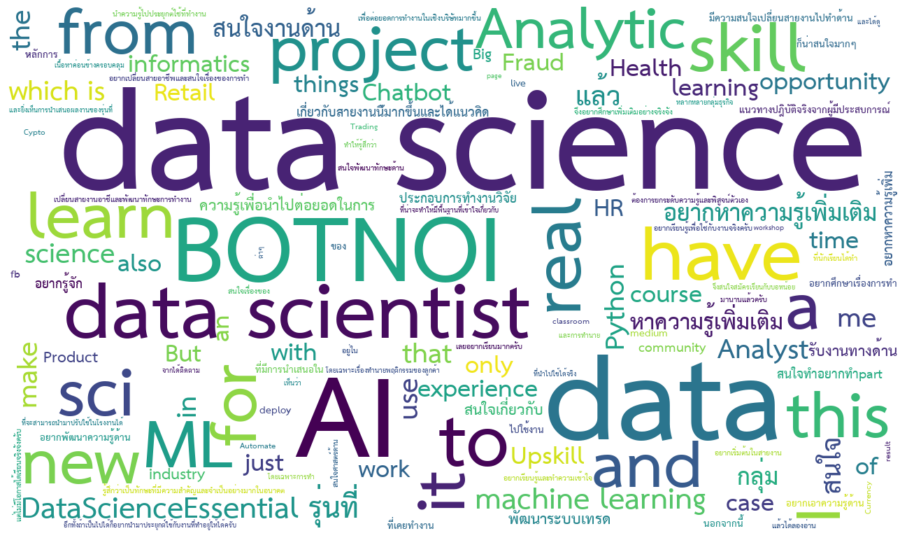

In [ ]:
path = '/content/THSarabunNew Bold.ttf'
stopwords = ["และ","เช่น","ครับ","หรือ","ๆ","อยู่แล้ว","มากขึ้น","ต่างๆ","ได้","ณ","คะ","ด้าน","เป็น","หา","กับ","ด้วย"]

wordcloud = WordCloud(font_path=path,
                      relative_scaling = 0.3,
                      min_font_size=10,
                      background_color="white",
                      width=1277,
                      height=750,
                      regexp=r"[ก-๙a-zA-Z']+",
                      stopwords=stopwords,
                      random_state=1).generate(textList)
plt.figure(figsize = (16, 16))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")